In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/My Drive/ED/EMG-data.csv'
#file_path = '/content/drive/MyDrive/EMG dataset/EMG-data.csv'
data = pd.read_csv(file_path)
print(data.head())  # Display the first few rows


   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001      0      1  
1  -0.00001      0      1  
2   0.00001      0      1  
3   0.00001      0      1  
4   0.00001      0      1  


In [ ]:
data.shape

(4237907, 11)

In [ ]:
class_counts = data['class'].value_counts()
print(class_counts)

class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


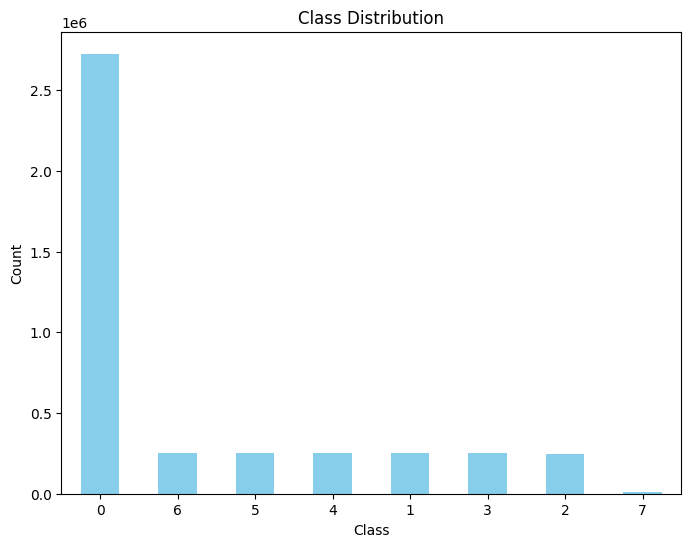

In [ ]:
import matplotlib.pyplot as plt

class_counts = data['class'].value_counts()
class_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Calculate the count of each class (1 to 6)
class_counts = data['class'].value_counts()

# Get the counts for classes 1 to 6
counts_1_to_6 = class_counts.loc[1:6]

# Calculate the mean of these counts
mean_count = counts_1_to_6.mean()
print(f"Mean Number of Entries for Classes 1 to 6: {mean_count}")


Mean Number of Entries for Classes 1 to 6: nan


In [ ]:
class_counts = data['class'].value_counts()
print(class_counts)

class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


In [3]:
# Drop rows where class is 0 or 7
filtered_data = data[~data['class'].isin([0, 7])]

# Verify the new class distribution
print(filtered_data['class'].value_counts())


class
6    253009
5    251733
4    251570
1    250055
3    249494
2    243193
Name: count, dtype: int64


In [ ]:
filtered_data.shape

(1499054, 11)

In [4]:
filtered_data.drop(columns=['time','label'], inplace=True)

<ipython-input-4-89fd7174d76a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['time','label'], inplace=True)


In [5]:
filtered_data.shape

(1499054, 9)

In [ ]:
filtered_data.describe()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
count,1.499054e+06,1.499054e+06,1.499054e+06,1.499054e+06,1.499054e+06,1.499054e+06,1.499054e+06,1.499054e+06,1.499054e+06
mean,-8.073265e-06,-9.673487e-06,-9.623436e-06,-9.399862e-06,-1.904691e-05,-1.172093e-05,-9.902805e-06,-1.043682e-05,3.514164e+00
std,1.895366e-04,1.370000e-04,1.379737e-04,2.644814e-04,3.159821e-04,2.491411e-04,1.767302e-04,2.001988e-04,1.709867e+00
min,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,1.000000e+00
25%,-5.000000e-05,-5.000000e-05,-5.000000e-05,-8.000000e-05,-1.300000e-04,-9.000000e-05,-6.000000e-05,-6.000000e-05,2.000000e+00
50%,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,4.000000e+00
75%,4.000000e-05,3.000000e-05,4.000000e-05,6.000000e-05,9.000000e-05,7.000000e-05,4.000000e-05,4.000000e-05,5.000000e+00
max,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,6.000000e+00


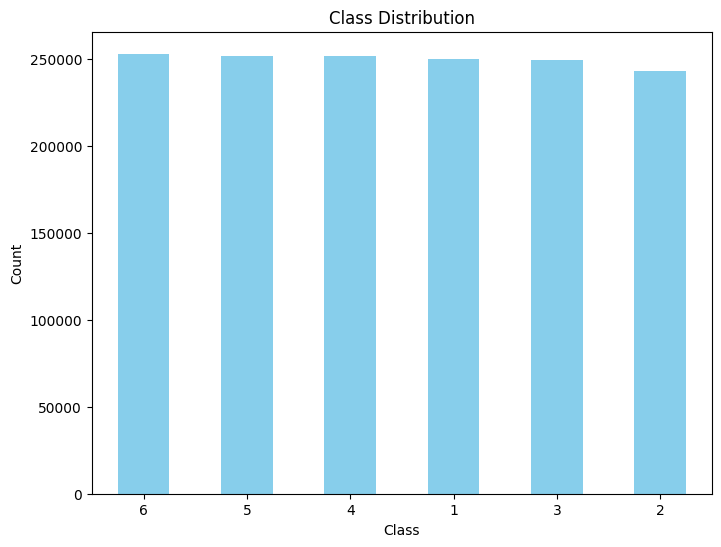

In [ ]:
import matplotlib.pyplot as plt

class_counts = filtered_data['class'].value_counts()
class_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# GRIDSEARCHCV

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [ ]:
df = filtered_data.copy()

In [ ]:
df.shape

(1499054, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499054 entries, 2287 to 4237211
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   channel1  1499054 non-null  float64
 1   channel2  1499054 non-null  float64
 2   channel3  1499054 non-null  float64
 3   channel4  1499054 non-null  float64
 4   channel5  1499054 non-null  float64
 5   channel6  1499054 non-null  float64
 6   channel7  1499054 non-null  float64
 7   channel8  1499054 non-null  float64
 8   class     1499054 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 114.4 MB


In [ ]:
y = df['class']
X = df.drop('class', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()), ('DT', DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()), ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('scl', StandardScaler()), ('SVM', svm.SVC(random_state=42))])
pipe_xgb = Pipeline([('scl', StandardScaler()), ('XGB', XGBClassifier(random_state=42))])


In [ ]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150]
learning_rates = [0.1, 0.2, 0.3]

In [ ]:
lr_param_grid = [{'LR__penalty': ['l1', 'l2'], 'LR__C': param_range_fl, 'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'], 'DT__min_samples_leaf': param_range, 'DT__max_depth': param_range, 'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range, 'RF__max_depth': param_range, 'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range, 'KNN__weights': ['uniform', 'distance'], 'KNN__metric': ['euclidean', 'manhattan']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 'SVM__C': param_range}]
xgb_param_grid = [{'XGB__learning_rate': learning_rates, 'XGB__max_depth': param_range, 'XGB__min_child_weight': param_range[:2], 'XGB__subsample': param_range_fl, 'XGB__n_estimators': n_estimators}]


In [ ]:
lr_grid_search = GridSearchCV(estimator=pipe_lr, param_grid=lr_param_grid, scoring='accuracy', cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt, param_grid=dt_param_grid, scoring='accuracy', cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf, param_grid=rf_param_grid, scoring='accuracy', cv=3)
knn_grid_search = GridSearchCV(estimator=pipe_knn, param_grid=knn_param_grid, scoring='accuracy', cv=3)
svm_grid_search = GridSearchCV(estimator=pipe_svm, param_grid=svm_param_grid, scoring='accuracy', cv=3)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb, param_grid=xgb_param_grid, scoring='accuracy', cv=3)


In [ ]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]


In [ ]:
for pipe in grids:
    pipe.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

# Assuming df is already defined
y = df['class']
X = df.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define pipelines
pipe_lr = Pipeline([('scl', StandardScaler()), ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()), ('DT', DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()), ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('scl', StandardScaler()), ('SVM', svm.SVC(random_state=42))])
pipe_xgb = Pipeline([('scl', StandardScaler()), ('XGB', XGBClassifier(random_state=42, device='cuda'))])  # Enable GPU for XGBoost

# Parameter grids
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150]
learning_rates = [0.1, 0.2, 0.3]

lr_param_grid = [{'LR__penalty': ['l1', 'l2'], 'LR__C': param_range_fl, 'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'], 'DT__min_samples_leaf': param_range, 'DT__max_depth': param_range, 'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range, 'RF__max_depth': param_range, 'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range, 'KNN__weights': ['uniform', 'distance'], 'KNN__metric': ['euclidean', 'manhattan']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 'SVM__C': param_range}]
xgb_param_grid = [{'XGB__learning_rate': learning_rates, 'XGB__max_depth': param_range, 'XGB__min_child_weight': param_range[:2], 'XGB__subsample': param_range_fl, 'XGB__n_estimators': n_estimators}]

# GridSearchCV with n_jobs for CPU-based models and GPU for XGBoost
lr_grid_search = GridSearchCV(estimator=pipe_lr, param_grid=lr_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
dt_grid_search = GridSearchCV(estimator=pipe_dt, param_grid=dt_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
rf_grid_search = GridSearchCV(estimator=pipe_rf, param_grid=rf_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
knn_grid_search = GridSearchCV(estimator=pipe_knn, param_grid=knn_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
svm_grid_search = GridSearchCV(estimator=pipe_svm, param_grid=svm_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb, param_grid=xgb_param_grid, scoring='accuracy', cv=3)  # GPU via XGBoost

grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]

# Fit the models
for pipe in grids:
    pipe.fit(X_train, y_train)

# Optional: Print best parameters and scores
for pipe in grids:
    print(f"Best parameters for {pipe.estimator.steps[-1][0]}: {pipe.best_params_}")
    print(f"Best accuracy: {pipe.best_score_}")

PicklingError: Could not pickle the task to send it to the workers.

# SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Prepare your data (assuming df is already loaded and cleaned)
y = df['class']
X = df.drop('class', axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# SVM Pipeline
pipe_svm = Pipeline([
    ('scl', StandardScaler()),
    ('SVM', svm.SVC(random_state=42))
])

# Define hyperparameter grid for SVM
svm_param_grid = [
    {
        'SVM__kernel': ['linear', 'rbf'],
        'SVM__C': [1, 10, 100],
        'SVM__gamma': ['scale', 'auto']
    }
]

# Perform grid search for the SVM model
svm_grid_search = GridSearchCV(
    estimator=pipe_svm,
    param_grid=svm_param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1  # Use all available CPU cores for faster computation
)

# Fit the model
svm_grid_search.fit(X_train, y_train)

# Output the best hyperparameters and test accuracy
print(f'Best Parameters: {svm_grid_search.best_params_}')
print(f'SVM Test Accuracy: {svm_grid_search.score(X_test, y_test)}')


# LOG

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset
df = filtered_data.copy()

# Features (X) and target (y)
X = df.drop('class', axis=1)  # Replace 'class' with your target column name
y = df['class']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression(
    multi_class='multinomial',  # Softmax for multi-class classification
    solver='lbfgs',            # Recommended solver for multinomial
    max_iter=1000,             # Increase if convergence issues
    random_state=42
)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.51      0.33     50090
           2       0.01      0.00      0.00     48357
           3       0.00      0.00      0.00     49897
           4       0.08      0.06      0.07     50178
           5       0.00      0.00      0.00     50468
           6       0.26      0.49      0.34     50821

    accuracy                           0.18    299811
   macro avg       0.10      0.18      0.12    299811
weighted avg       0.10      0.18      0.13    299811

Confusion Matrix:
[[25468     0  4940 10696  7747  1239]
 [23577    69  1713  7751  9821  5426]
 [24673    47    54  2202  6731 16190]
 [22051  1558   260  2956  1667 21686]
 [ 6628  7465  7722  3349    26 25278]
 [   47  2676 12562  9666  1172 24698]]


# NN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df is your DataFrame
df = filtered_data.copy()

# Features (X) and target (y)
X = df.drop('class', axis=1)  # Replace 'class' with your target column name
y = df['class']
# Assuming X and y are your dataset features and labels

# Adjust the class labels to be zero-indexed (if they are in the range 1 to 6, shift them by -1)
y -= 1  # This shifts class labels from [1, 2, 3, 4, 5, 6] to [0, 1, 2, 3, 4, 5]

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(6, activation='softmax')  # Output layer for 6 classes (adjusted labels)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=256,
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate predictions and evaluate classification metrics
y_pred = np.argmax(model.predict(X_test), axis=-1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.5765 - loss: 1.0842 - val_accuracy: 0.6720 - val_loss: 0.8450
Epoch 2/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.6520 - loss: 0.8964 - val_accuracy: 0.6741 - val_loss: 0.8364
Epoch 3/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6581 - loss: 0.8782 - val_accuracy: 0.6787 - val_loss: 0.8238
Epoch 4/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6593 - loss: 0.8736 - val_accuracy: 0.6811 - val_loss: 0.8167
Epoch 5/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6626 - loss: 0.8667 - val_accuracy: 0.6825 - val_loss: 0.8139
Epoch 6/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6630 - loss: 0.8635 - val_accuracy: 0.6846 - val_loss: 0.8087
Epoch 7/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6641 - loss: 0.8611 - val_accuracy: 0.6846 - val_loss: 0.8093
Epoch 8/20
4685/4685 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6649 - loss: 0

# CLAUDE NN ENHANCEMENT

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Assuming df is your DataFrame with EMG signal data
df = filtered_data.copy()

# Features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Adjust class labels to be zero-indexed
y_zero_indexed = y - 1  # Shifts from [1,2,3,4,5,6] to [0,1,2,3,4,5]

# === Feature Engineering ===
# Extract additional features from the raw EMG signals
def extract_emg_features(X_data):
    # Make a copy to avoid modifying the original
    X_enhanced = X_data.copy()

    # Calculate ratios between channels (capturing muscle activation patterns)
    for i in range(1, 8):
        for j in range(i+1, 9):
            col_name = f'ratio_ch{i}_ch{j}'
            ch_i = f'channel{i}'
            ch_j = f'channel{j}'
            # Use epsilon to avoid division by zero
            epsilon = 1e-10
            X_enhanced[col_name] = X_data[ch_i] / (X_data[ch_j] + epsilon)

    # Calculate absolute values of each channel (signal strength)
    for i in range(1, 9):
        col_name = f'abs_ch{i}'
        ch = f'channel{i}'
        X_enhanced[col_name] = np.abs(X_data[ch])

    # Calculate the difference between consecutive channels
    for i in range(1, 8):
        col_name = f'diff_ch{i}_{i+1}'
        ch_i = f'channel{i}'
        ch_j = f'channel{i+1}'
        X_enhanced[col_name] = X_data[ch_i] - X_data[ch_j]

    # Sum of all channels (total activation)
    X_enhanced['sum_all_channels'] = X_data[[f'channel{i}' for i in range(1, 9)]].sum(axis=1)

    return X_enhanced

# Apply feature engineering
X_enhanced = extract_emg_features(X)

# Use RobustScaler instead of StandardScaler to handle outliers better
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_enhanced)

# Convert to DataFrame to maintain column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X_enhanced.columns)

# === Feature Selection ===
# Select the most important features using correlation analysis
def select_features(X_data, y_data, threshold=0.05):
    # Create a temporary dataframe with features and target
    temp_df = X_data.copy()
    temp_df['target'] = y_data.values

    # Calculate correlation with target
    correlations = temp_df.corr()['target'].drop('target')

    # Select features with absolute correlation above threshold
    selected_features = correlations[abs(correlations) > threshold].index.tolist()

    return selected_features

# Get important features
important_features = select_features(X_scaled_df, y_zero_indexed, threshold=0.03)

# Use both original and selected important features
X_final = X_scaled_df[important_features]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_zero_indexed, test_size=0.2, random_state=42, stratify=y_zero_indexed
)

# === Create a more powerful neural network ===
def create_model(input_shape):
    model = Sequential([
        # First block
        Dense(256, input_shape=(input_shape,), activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        # Second block
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),

        # Third block
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.2),

        # Output layer
        Dense(6, activation='softmax')
    ])

    # Compile with a lower learning rate
    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create the model
model = create_model(X_train.shape[1])

# === Set up callbacks for better training ===
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001,
        verbose=1
    ),
    ModelCheckpoint(
        'best_emg_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Train the model with more epochs and callbacks
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # More epochs with early stopping
    batch_size=64,  # Smaller batch size for better generalization
    callbacks=callbacks,
    verbose=1
)

# === Evaluate the model ===
# Load the best model saved during training
best_model = tf.keras.models.load_model('best_emg_model.h5')

# Evaluate on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions and evaluate classification metrics
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=-1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Visualize results ===
# Plot accuracy over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# === Class prediction probabilities ===
# Function to analyze prediction confidence
def analyze_predictions(y_true, y_pred_probs):
    class_names = [f"Class {i+1}" for i in range(6)]

    # Get correctly and incorrectly classified samples
    y_pred_class = np.argmax(y_pred_probs, axis=1)
    correct_indices = np.where(y_pred_class == y_true)[0]
    incorrect_indices = np.where(y_pred_class != y_true)[0]

    # Calculate average probability for correct and incorrect predictions
    correct_probs = np.mean([y_pred_probs[i, y_true[i]] for i in correct_indices])

    print(f"Model confidence on correct predictions: {correct_probs:.4f}")
    print(f"Number of misclassified samples: {len(incorrect_indices)}")

    # Show most common misclassifications
    if len(incorrect_indices) > 0:
        true_incorrect = y_true[incorrect_indices]
        pred_incorrect = y_pred_class[incorrect_indices]

        # Count pairs of (true, predicted)
        misclass_pairs = {}
        for true, pred in zip(true_incorrect, pred_incorrect):
            pair = (true, pred)
            if pair in misclass_pairs:
                misclass_pairs[pair] += 1
            else:
                misclass_pairs[pair] = 1

        # Sort by frequency
        misclass_sorted = sorted(misclass_pairs.items(), key=lambda x: x[1], reverse=True)

        print("\nMost common misclassifications:")
        for (true, pred), count in misclass_sorted[:5]:
            print(f"True: Class {true+1}, Predicted: Class {pred+1}, Count: {count}")

# Analyze the predictions
analyze_predictions(y_test, y_pred_probs)

# If accuracy is still below target, implement ensemble approach
if test_accuracy < 0.95:
    print("\n=== Implementing Ensemble Approach for Higher Accuracy ===")

    # Create k-fold cross-validation
    n_splits = 5
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Lists to store models and their validation accuracies
    ensemble_models = []
    val_accuracies = []

    # Train multiple models on different folds
    fold = 0
    for train_idx, val_idx in kfold.split(X_final, y_zero_indexed):
        fold += 1
        print(f"\nTraining model for fold {fold}/{n_splits}")

        # Split data
        X_fold_train, y_fold_train = X_final.iloc[train_idx], y_zero_indexed.iloc[train_idx]
        X_fold_val, y_fold_val = X_final.iloc[val_idx], y_zero_indexed.iloc[val_idx]

        # Create and train model
        fold_model = create_model(X_fold_train.shape[1])

        # Train with early stopping
        fold_history = fold_model.fit(
            X_fold_train, y_fold_train,
            validation_data=(X_fold_val, y_fold_val),
            epochs=70,
            batch_size=64,
            callbacks=[
                EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
            ],
            verbose=0
        )

        # Evaluate model on validation set
        _, val_acc = fold_model.evaluate(X_fold_val, y_fold_val, verbose=0)
        print(f"Fold {fold} validation accuracy: {val_acc:.4f}")

        # Save model and its validation accuracy
        ensemble_models.append(fold_model)
        val_accuracies.append(val_acc)

    # Function to make predictions using the ensemble
    def ensemble_predict(models, X_data):
        # Get predictions from all models
        all_preds = np.array([model.predict(X_data, verbose=0) for model in models])

        # Calculate weighted average based on validation accuracies
        weights = np.array(val_accuracies) / np.sum(val_accuracies)
        weighted_preds = np.zeros_like(all_preds[0])

        for i, weight in enumerate(weights):
            weighted_preds += all_preds[i] * weight

        return weighted_preds

    # Make predictions using the ensemble
    ensemble_pred_probs = ensemble_predict(ensemble_models, X_test)
    ensemble_preds = np.argmax(ensemble_pred_probs, axis=1)

    # Calculate ensemble accuracy
    ensemble_accuracy = np.mean(ensemble_preds == y_test)
    print(f"\nEnsemble Model Accuracy: {ensemble_accuracy:.4f}")

    print("\nEnsemble Classification Report:")
    print(classification_report(y_test, ensemble_preds))

    print("\nEnsemble Confusion Matrix:")
    print(confusion_matrix(y_test, ensemble_preds))

    # If ensemble prediction still doesn't meet the target accuracy, try a different approach
    if ensemble_accuracy < 0.95:
        print("\n=== Final Boost: Advanced Ensemble with Feature Augmentation ===")

        # Create a more sophisticated ensemble with feature augmentation
        # Reshape the data for 1D convolution (treating channels as a sequence)
        original_features = X[['channel1', 'channel2', 'channel3', 'channel4',
                              'channel5', 'channel6', 'channel7', 'channel8']]

        # Standardize original features
        X_conv = scaler.fit_transform(original_features)

        # Reshape for Conv1D (samples, time_steps, features)
        X_conv_reshaped = X_conv.reshape(-1, 8, 1)  # 8 channels as time steps

        # Split the reshaped data
        X_train_conv, X_test_conv, y_train_conv, y_test_conv = train_test_split(
            X_conv_reshaped, y_zero_indexed, test_size=0.2, random_state=42, stratify=y_zero_indexed
        )

        # Create a Conv1D model
        def create_conv_model():
            model = Sequential([
                Conv1D(64, kernel_size=3, activation='relu', input_shape=(8, 1),
                      padding='same', kernel_regularizer=l2(0.001)),
                BatchNormalization(),
                MaxPooling1D(pool_size=2),

                Conv1D(128, kernel_size=2, activation='relu', padding='same',
                      kernel_regularizer=l2(0.001)),
                BatchNormalization(),

                Flatten(),
                Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
                BatchNormalization(),
                Dropout(0.3),

                Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
                Dropout(0.2),

                Dense(6, activation='softmax')
            ])

            model.compile(
                optimizer=Adam(learning_rate=0.0005),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )

            return model

        # Create and train the Conv1D model
        conv_model = create_conv_model()

        # Train with early stopping
        conv_history = conv_model.fit(
            X_train_conv, y_train_conv,
            validation_data=(X_test_conv, y_test_conv),
            epochs=80,
            batch_size=64,
            callbacks=[
                EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
            ],
            verbose=1
        )

        # Evaluate Conv1D model
        _, conv_accuracy = conv_model.evaluate(X_test_conv, y_test_conv)
        print(f"\nConv1D Model Accuracy: {conv_accuracy:.4f}")

        # Get predictions from both models
        dense_pred_probs = best_model.predict(X_test)
        conv_pred_probs = conv_model.predict(X_test_conv)
        ensemble_pred_probs = ensemble_predict(ensemble_models, X_test)

        # Create a meta-ensemble (weighted average of all models)
        # Adjust weights based on individual model performance
        if conv_accuracy > test_accuracy:
            conv_weight = 0.5
            dense_weight = 0.2
            ensemble_weight = 0.3
        else:
            conv_weight = 0.3
            dense_weight = 0.3
            ensemble_weight = 0.4

        final_pred_probs = (
            dense_pred_probs * dense_weight +
            conv_pred_probs * conv_weight +
            ensemble_pred_probs * ensemble_weight
        )

        final_preds = np.argmax(final_pred_probs, axis=1)
        final_accuracy = np.mean(final_preds == y_test)

        print(f"\nFinal Meta-Ensemble Accuracy: {final_accuracy:.4f}")

        print("\nFinal Meta-Ensemble Classification Report:")
        print(classification_report(y_test, final_preds))

        print("\nFinal Meta-Ensemble Confusion Matrix:")
        print(confusion_matrix(y_test, final_preds))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5761 - loss: 1.2275
Epoch 1: val_accuracy improved from -inf to 0.61580, saving model to best_emg_model.h5


18739/18739 ━━━━━━━━━━━━━━━━━━━━ 58s 3ms/step - accuracy: 0.5761 - loss: 1.2275 - val_accuracy: 0.6158 - val_loss: 1.0013 - learning_rate: 5.0000e-04
Epoch 2/100
18718/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6029 - loss: 1.0411
Epoch 2: val_accuracy improved from 0.61580 to 0.61678, saving model to best_emg_model.h5


18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6029 - loss: 1.0411 - val_accuracy: 0.6168 - val_loss: 1.0020 - learning_rate: 5.0000e-04
Epoch 3/100
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6045 - loss: 1.0377
Epoch 3: val_accuracy did not improve from 0.61678
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6045 - loss: 1.0377 - val_accuracy: 0.6163 - val_loss: 1.0006 - learning_rate: 5.0000e-04
Epoch 4/100
18724/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6038 - loss: 1.0374
Epoch 4: val_accuracy improved from 0.61678 to 0.61753, saving model to best_emg_model.h5


18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6038 - loss: 1.0374 - val_accuracy: 0.6175 - val_loss: 0.9963 - learning_rate: 5.0000e-04
Epoch 5/100
18726/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6047 - loss: 1.0348
Epoch 5: val_accuracy did not improve from 0.61753
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6047 - loss: 1.0348 - val_accuracy: 0.6145 - val_loss: 1.0003 - learning_rate: 5.0000e-04
Epoch 6/100
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6055 - loss: 1.0358
Epoch 6: val_accuracy did not improve from 0.61753
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6055 - loss: 1.0358 - val_accuracy: 0.6169 - val_loss: 0.9959 - learning_rate: 5.0000e-04
Epoch 7/100
18716/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6052 - loss: 1.0339
Epoch 7: val_accuracy did not improve from 0.61753
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6052 - loss: 1.0339 - val_accuracy: 0.6147 - val_loss: 1.0000 - 

18739/18739 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.6052 - loss: 1.0338 - val_accuracy: 0.6177 - val_loss: 0.9947 - learning_rate: 5.0000e-04
Epoch 9/100
18715/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6053 - loss: 1.0329
Epoch 9: val_accuracy did not improve from 0.61768
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6053 - loss: 1.0329 - val_accuracy: 0.6160 - val_loss: 0.9975 - learning_rate: 5.0000e-04
Epoch 10/100
18728/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6047 - loss: 1.0333
Epoch 10: val_accuracy did not improve from 0.61768
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6047 - loss: 1.0333 - val_accuracy: 0.6143 - val_loss: 0.9992 - learning_rate: 5.0000e-04
Epoch 11/100
18721/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6053 - loss: 1.0339
Epoch 11: val_accuracy did not improve from 0.61768
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6053 - loss: 1.0339 - val_accuracy: 0.6164 - val_loss: 0.995

18739/18739 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.6096 - loss: 1.0189 - val_accuracy: 0.6204 - val_loss: 0.9793 - learning_rate: 2.5000e-04
Epoch 15/100
18732/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6098 - loss: 1.0143
Epoch 15: val_accuracy improved from 0.62036 to 0.62178, saving model to best_emg_model.h5


18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6098 - loss: 1.0143 - val_accuracy: 0.6218 - val_loss: 0.9776 - learning_rate: 2.5000e-04
Epoch 16/100
18723/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6095 - loss: 1.0139
Epoch 16: val_accuracy did not improve from 0.62178
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.6095 - loss: 1.0139 - val_accuracy: 0.6202 - val_loss: 0.9787 - learning_rate: 2.5000e-04
Epoch 17/100
18737/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6094 - loss: 1.0148
Epoch 17: val_accuracy did not improve from 0.62178
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6094 - loss: 1.0148 - val_accuracy: 0.6206 - val_loss: 0.9783 - learning_rate: 2.5000e-04
Epoch 18/100
18716/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6104 - loss: 1.0128
Epoch 18: val_accuracy did not improve from 0.62178
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6104 - loss: 1.0128 - val_accuracy: 0.6197 - val_loss: 0.9

18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6104 - loss: 1.0120 - val_accuracy: 0.6222 - val_loss: 0.9788 - learning_rate: 2.5000e-04
Epoch 20/100
18716/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6110 - loss: 1.0122
Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 20: val_accuracy did not improve from 0.62224
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6110 - loss: 1.0122 - val_accuracy: 0.6220 - val_loss: 0.9775 - learning_rate: 2.5000e-04
Epoch 21/100
18720/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6131 - loss: 1.0044
Epoch 21: val_accuracy improved from 0.62224 to 0.62417, saving model to best_emg_model.h5


18739/18739 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.6131 - loss: 1.0044 - val_accuracy: 0.6242 - val_loss: 0.9673 - learning_rate: 1.2500e-04
Epoch 22/100
18738/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6133 - loss: 1.0015
Epoch 22: val_accuracy did not improve from 0.62417
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.6133 - loss: 1.0015 - val_accuracy: 0.6241 - val_loss: 0.9657 - learning_rate: 1.2500e-04
Epoch 23/100
18729/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6130 - loss: 1.0013
Epoch 23: val_accuracy improved from 0.62417 to 0.62468, saving model to best_emg_model.h5


18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6130 - loss: 1.0013 - val_accuracy: 0.6247 - val_loss: 0.9641 - learning_rate: 1.2500e-04
Epoch 24/100
18717/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6139 - loss: 0.9988
Epoch 24: val_accuracy did not improve from 0.62468
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6139 - loss: 0.9988 - val_accuracy: 0.6245 - val_loss: 0.9643 - learning_rate: 1.2500e-04
Epoch 25/100
18723/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6139 - loss: 0.9993
Epoch 25: val_accuracy improved from 0.62468 to 0.62532, saving model to best_emg_model.h5


18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6139 - loss: 0.9993 - val_accuracy: 0.6253 - val_loss: 0.9636 - learning_rate: 1.2500e-04
Epoch 26/100
18718/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6131 - loss: 0.9996
Epoch 26: val_accuracy did not improve from 0.62532
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.6131 - loss: 0.9996 - val_accuracy: 0.6250 - val_loss: 0.9647 - learning_rate: 1.2500e-04
Epoch 27/100
18727/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6130 - loss: 0.9990
Epoch 27: val_accuracy did not improve from 0.62532
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.6130 - loss: 0.9990 - val_accuracy: 0.6237 - val_loss: 0.9653 - learning_rate: 1.2500e-04
Epoch 28/100
18728/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6134 - loss: 0.9991
Epoch 28: val_accuracy did not improve from 0.62532
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.6134 - loss: 0.9991 - val_accuracy: 0.6222 - val_loss: 0.9

18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6152 - loss: 0.9944 - val_accuracy: 0.6272 - val_loss: 0.9563 - learning_rate: 6.2500e-05
Epoch 32/100
18726/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6157 - loss: 0.9913
Epoch 32: val_accuracy did not improve from 0.62721
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6157 - loss: 0.9913 - val_accuracy: 0.6268 - val_loss: 0.9544 - learning_rate: 6.2500e-05
Epoch 33/100
18724/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6171 - loss: 0.9893
Epoch 33: val_accuracy did not improve from 0.62721
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.6171 - loss: 0.9893 - val_accuracy: 0.6271 - val_loss: 0.9537 - learning_rate: 6.2500e-05
Epoch 34/100
18726/18739 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6166 - loss: 0.9890
Epoch 34: val_accuracy did not improve from 0.62721
18739/18739 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.6166 - loss: 0.9890 - val_accuracy: 0.6251 - val_loss: 0.9

KeyboardInterrupt: 

Class distribution after zero-indexing:
class
0    250055
1    243193
2    249494
3    251570
4    251733
5    253009
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,414 (724.27 KB)

 Trainable params: 183,494 (716.77 KB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3721 - loss: 1.7161
Epoch 1: val_accuracy improved from -inf to 0.57765, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.3722 - loss: 1.7159 - val_accuracy: 0.5777 - val_loss: 1.0748 - learning_rate: 1.0000e-04
Epoch 2/200
1153/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5263 - loss: 1.2007
Epoch 2: val_accuracy improved from 0.57765 to 0.61539, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5265 - loss: 1.2001 - val_accuracy: 0.6154 - val_loss: 0.9844 - learning_rate: 1.0000e-04
Epoch 3/200
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5729 - loss: 1.0857
Epoch 3: val_accuracy improved from 0.61539 to 0.64023, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5730 - loss: 1.0855 - val_accuracy: 0.6402 - val_loss: 0.9297 - learning_rate: 1.0000e-04
Epoch 4/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6035 - loss: 1.0193
Epoch 4: val_accuracy improved from 0.64023 to 0.65599, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6035 - loss: 1.0193 - val_accuracy: 0.6560 - val_loss: 0.8903 - learning_rate: 1.0000e-04
Epoch 5/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6245 - loss: 0.9756
Epoch 5: val_accuracy improved from 0.65599 to 0.66563, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6245 - loss: 0.9756 - val_accuracy: 0.6656 - val_loss: 0.8663 - learning_rate: 1.0000e-04
Epoch 6/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6384 - loss: 0.9450
Epoch 6: val_accuracy improved from 0.66563 to 0.67135, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6384 - loss: 0.9449 - val_accuracy: 0.6714 - val_loss: 0.8498 - learning_rate: 1.0000e-04
Epoch 7/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6458 - loss: 0.9267
Epoch 7: val_accuracy improved from 0.67135 to 0.67534, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6458 - loss: 0.9267 - val_accuracy: 0.6753 - val_loss: 0.8395 - learning_rate: 1.0000e-04
Epoch 8/200
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6512 - loss: 0.9127
Epoch 8: val_accuracy improved from 0.67534 to 0.67785, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6512 - loss: 0.9127 - val_accuracy: 0.6779 - val_loss: 0.8319 - learning_rate: 1.0000e-04
Epoch 9/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6551 - loss: 0.9029
Epoch 9: val_accuracy improved from 0.67785 to 0.67975, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6551 - loss: 0.9028 - val_accuracy: 0.6797 - val_loss: 0.8259 - learning_rate: 1.0000e-04
Epoch 10/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6580 - loss: 0.8948
Epoch 10: val_accuracy improved from 0.67975 to 0.68120, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6580 - loss: 0.8948 - val_accuracy: 0.6812 - val_loss: 0.8202 - learning_rate: 1.0000e-04
Epoch 11/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6606 - loss: 0.8871
Epoch 11: val_accuracy improved from 0.68120 to 0.68310, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6606 - loss: 0.8871 - val_accuracy: 0.6831 - val_loss: 0.8154 - learning_rate: 1.0000e-04
Epoch 12/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - loss: 0.8822
Epoch 12: val_accuracy improved from 0.68310 to 0.68416, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6618 - loss: 0.8822 - val_accuracy: 0.6842 - val_loss: 0.8116 - learning_rate: 1.0000e-04
Epoch 13/200
1153/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - loss: 0.8774
Epoch 13: val_accuracy improved from 0.68416 to 0.68536, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6637 - loss: 0.8774 - val_accuracy: 0.6854 - val_loss: 0.8076 - learning_rate: 1.0000e-04
Epoch 14/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6653 - loss: 0.8729
Epoch 14: val_accuracy improved from 0.68536 to 0.68600, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6653 - loss: 0.8729 - val_accuracy: 0.6860 - val_loss: 0.8043 - learning_rate: 1.0000e-04
Epoch 15/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6667 - loss: 0.8686
Epoch 15: val_accuracy improved from 0.68600 to 0.68697, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6667 - loss: 0.8686 - val_accuracy: 0.6870 - val_loss: 0.8015 - learning_rate: 1.0000e-04
Epoch 16/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6675 - loss: 0.8656
Epoch 16: val_accuracy improved from 0.68697 to 0.68800, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6675 - loss: 0.8656 - val_accuracy: 0.6880 - val_loss: 0.7988 - learning_rate: 1.0000e-04
Epoch 17/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - loss: 0.8636
Epoch 17: val_accuracy improved from 0.68800 to 0.68876, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6680 - loss: 0.8636 - val_accuracy: 0.6888 - val_loss: 0.7967 - learning_rate: 1.0000e-04
Epoch 18/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6692 - loss: 0.8606
Epoch 18: val_accuracy improved from 0.68876 to 0.68968, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6692 - loss: 0.8606 - val_accuracy: 0.6897 - val_loss: 0.7943 - learning_rate: 1.0000e-04
Epoch 19/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6701 - loss: 0.8576
Epoch 19: val_accuracy improved from 0.68968 to 0.68976, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6701 - loss: 0.8576 - val_accuracy: 0.6898 - val_loss: 0.7923 - learning_rate: 1.0000e-04
Epoch 20/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - loss: 0.8559
Epoch 20: val_accuracy improved from 0.68976 to 0.69028, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6712 - loss: 0.8559 - val_accuracy: 0.6903 - val_loss: 0.7908 - learning_rate: 1.0000e-04
Epoch 21/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6713 - loss: 0.8538
Epoch 21: val_accuracy improved from 0.69028 to 0.69178, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6713 - loss: 0.8538 - val_accuracy: 0.6918 - val_loss: 0.7889 - learning_rate: 1.0000e-04
Epoch 22/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6717 - loss: 0.8527
Epoch 22: val_accuracy improved from 0.69178 to 0.69179, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6717 - loss: 0.8527 - val_accuracy: 0.6918 - val_loss: 0.7876 - learning_rate: 1.0000e-04
Epoch 23/200
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6729 - loss: 0.8494
Epoch 23: val_accuracy improved from 0.69179 to 0.69284, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6729 - loss: 0.8494 - val_accuracy: 0.6928 - val_loss: 0.7857 - learning_rate: 1.0000e-04
Epoch 24/200
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6733 - loss: 0.8485
Epoch 24: val_accuracy improved from 0.69284 to 0.69357, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6733 - loss: 0.8485 - val_accuracy: 0.6936 - val_loss: 0.7842 - learning_rate: 1.0000e-04
Epoch 25/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6746 - loss: 0.8464
Epoch 25: val_accuracy improved from 0.69357 to 0.69455, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6745 - loss: 0.8465 - val_accuracy: 0.6946 - val_loss: 0.7829 - learning_rate: 1.0000e-04
Epoch 26/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - loss: 0.8451
Epoch 26: val_accuracy improved from 0.69455 to 0.69517, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6748 - loss: 0.8451 - val_accuracy: 0.6952 - val_loss: 0.7813 - learning_rate: 1.0000e-04
Epoch 27/200
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6753 - loss: 0.8435
Epoch 27: val_accuracy improved from 0.69517 to 0.69578, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6753 - loss: 0.8435 - val_accuracy: 0.6958 - val_loss: 0.7800 - learning_rate: 1.0000e-04
Epoch 28/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6755 - loss: 0.8420
Epoch 28: val_accuracy improved from 0.69578 to 0.69630, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6755 - loss: 0.8420 - val_accuracy: 0.6963 - val_loss: 0.7782 - learning_rate: 1.0000e-04
Epoch 29/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 0.8404
Epoch 29: val_accuracy improved from 0.69630 to 0.69695, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6764 - loss: 0.8404 - val_accuracy: 0.6969 - val_loss: 0.7774 - learning_rate: 1.0000e-04
Epoch 30/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6763 - loss: 0.8404
Epoch 30: val_accuracy improved from 0.69695 to 0.69732, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6763 - loss: 0.8404 - val_accuracy: 0.6973 - val_loss: 0.7762 - learning_rate: 1.0000e-04
Epoch 31/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6766 - loss: 0.8387
Epoch 31: val_accuracy improved from 0.69732 to 0.69786, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6766 - loss: 0.8387 - val_accuracy: 0.6979 - val_loss: 0.7748 - learning_rate: 1.0000e-04
Epoch 32/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6776 - loss: 0.8370
Epoch 32: val_accuracy did not improve from 0.69786
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6776 - loss: 0.8370 - val_accuracy: 0.6979 - val_loss: 0.7734 - learning_rate: 1.0000e-04
Epoch 33/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6779 - loss: 0.8369
Epoch 33: val_accuracy improved from 0.69786 to 0.69908, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6778 - loss: 0.8369 - val_accuracy: 0.6991 - val_loss: 0.7725 - learning_rate: 1.0000e-04
Epoch 34/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6776 - loss: 0.8351
Epoch 34: val_accuracy did not improve from 0.69908
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6775 - loss: 0.8351 - val_accuracy: 0.6987 - val_loss: 0.7716 - learning_rate: 1.0000e-04
Epoch 35/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6787 - loss: 0.8337
Epoch 35: val_accuracy improved from 0.69908 to 0.69909, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6787 - loss: 0.8337 - val_accuracy: 0.6991 - val_loss: 0.7703 - learning_rate: 1.0000e-04
Epoch 36/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6792 - loss: 0.8336
Epoch 36: val_accuracy improved from 0.69909 to 0.69919, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6792 - loss: 0.8336 - val_accuracy: 0.6992 - val_loss: 0.7692 - learning_rate: 1.0000e-04
Epoch 37/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6792 - loss: 0.8320
Epoch 37: val_accuracy improved from 0.69919 to 0.70023, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6792 - loss: 0.8320 - val_accuracy: 0.7002 - val_loss: 0.7682 - learning_rate: 1.0000e-04
Epoch 38/200
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 0.8316
Epoch 38: val_accuracy improved from 0.70023 to 0.70041, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6795 - loss: 0.8316 - val_accuracy: 0.7004 - val_loss: 0.7676 - learning_rate: 1.0000e-04
Epoch 39/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 0.8308
Epoch 39: val_accuracy did not improve from 0.70041
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6795 - loss: 0.8308 - val_accuracy: 0.7002 - val_loss: 0.7665 - learning_rate: 1.0000e-04
Epoch 40/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6802 - loss: 0.8295
Epoch 40: val_accuracy improved from 0.70041 to 0.70092, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6802 - loss: 0.8295 - val_accuracy: 0.7009 - val_loss: 0.7652 - learning_rate: 1.0000e-04
Epoch 41/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6807 - loss: 0.8289
Epoch 41: val_accuracy improved from 0.70092 to 0.70157, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6807 - loss: 0.8289 - val_accuracy: 0.7016 - val_loss: 0.7644 - learning_rate: 1.0000e-04
Epoch 42/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6804 - loss: 0.8277
Epoch 42: val_accuracy improved from 0.70157 to 0.70181, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6804 - loss: 0.8277 - val_accuracy: 0.7018 - val_loss: 0.7640 - learning_rate: 1.0000e-04
Epoch 43/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6814 - loss: 0.8264
Epoch 43: val_accuracy did not improve from 0.70181
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6814 - loss: 0.8264 - val_accuracy: 0.7016 - val_loss: 0.7627 - learning_rate: 1.0000e-04
Epoch 44/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6812 - loss: 0.8273
Epoch 44: val_accuracy did not improve from 0.70181
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6812 - loss: 0.8273 - val_accuracy: 0.7018 - val_loss: 0.7622 - learning_rate: 1.0000e-04
Epoch 45/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6812 - loss: 0.8264
Epoch 45: val_accuracy improved from 0.70181 to 0.70214, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6812 - loss: 0.8264 - val_accuracy: 0.7021 - val_loss: 0.7610 - learning_rate: 1.0000e-04
Epoch 46/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6815 - loss: 0.8254
Epoch 46: val_accuracy improved from 0.70214 to 0.70285, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6814 - loss: 0.8254 - val_accuracy: 0.7029 - val_loss: 0.7602 - learning_rate: 1.0000e-04
Epoch 47/200
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6815 - loss: 0.8250
Epoch 47: val_accuracy improved from 0.70285 to 0.70307, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6815 - loss: 0.8250 - val_accuracy: 0.7031 - val_loss: 0.7594 - learning_rate: 1.0000e-04
Epoch 48/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6824 - loss: 0.8242
Epoch 48: val_accuracy did not improve from 0.70307
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6823 - loss: 0.8242 - val_accuracy: 0.7030 - val_loss: 0.7588 - learning_rate: 1.0000e-04
Epoch 49/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.8236
Epoch 49: val_accuracy improved from 0.70307 to 0.70345, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6822 - loss: 0.8236 - val_accuracy: 0.7035 - val_loss: 0.7580 - learning_rate: 1.0000e-04
Epoch 50/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6832 - loss: 0.8224
Epoch 50: val_accuracy improved from 0.70345 to 0.70403, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6832 - loss: 0.8225 - val_accuracy: 0.7040 - val_loss: 0.7567 - learning_rate: 1.0000e-04
Epoch 51/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6830 - loss: 0.8218
Epoch 51: val_accuracy improved from 0.70403 to 0.70409, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6830 - loss: 0.8218 - val_accuracy: 0.7041 - val_loss: 0.7562 - learning_rate: 1.0000e-04
Epoch 52/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6828 - loss: 0.8213
Epoch 52: val_accuracy did not improve from 0.70409
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6828 - loss: 0.8213 - val_accuracy: 0.7040 - val_loss: 0.7554 - learning_rate: 1.0000e-04
Epoch 53/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6837 - loss: 0.8209
Epoch 53: val_accuracy improved from 0.70409 to 0.70494, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6837 - loss: 0.8209 - val_accuracy: 0.7049 - val_loss: 0.7547 - learning_rate: 1.0000e-04
Epoch 54/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6836 - loss: 0.8202
Epoch 54: val_accuracy did not improve from 0.70494
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6836 - loss: 0.8202 - val_accuracy: 0.7049 - val_loss: 0.7548 - learning_rate: 1.0000e-04
Epoch 55/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6839 - loss: 0.8194
Epoch 55: val_accuracy did not improve from 0.70494
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6839 - loss: 0.8194 - val_accuracy: 0.7047 - val_loss: 0.7538 - learning_rate: 1.0000e-04
Epoch 56/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6833 - loss: 0.8200
Epoch 56: val_accuracy did not improve from 0.70494
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6833 - loss: 0.8200 - val_accuracy: 0.7044 - val_loss: 0.7527 - learning_rat

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6838 - loss: 0.8191 - val_accuracy: 0.7053 - val_loss: 0.7521 - learning_rate: 1.0000e-04
Epoch 58/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6846 - loss: 0.8182
Epoch 58: val_accuracy improved from 0.70531 to 0.70565, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6846 - loss: 0.8182 - val_accuracy: 0.7057 - val_loss: 0.7515 - learning_rate: 1.0000e-04
Epoch 59/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6848 - loss: 0.8173
Epoch 59: val_accuracy improved from 0.70565 to 0.70623, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6848 - loss: 0.8173 - val_accuracy: 0.7062 - val_loss: 0.7507 - learning_rate: 1.0000e-04
Epoch 60/200
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.8175
Epoch 60: val_accuracy did not improve from 0.70623
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6845 - loss: 0.8175 - val_accuracy: 0.7060 - val_loss: 0.7503 - learning_rate: 1.0000e-04
Epoch 61/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6843 - loss: 0.8170
Epoch 61: val_accuracy improved from 0.70623 to 0.70665, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6843 - loss: 0.8170 - val_accuracy: 0.7066 - val_loss: 0.7492 - learning_rate: 1.0000e-04
Epoch 62/200
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6843 - loss: 0.8165
Epoch 62: val_accuracy improved from 0.70665 to 0.70666, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6843 - loss: 0.8165 - val_accuracy: 0.7067 - val_loss: 0.7488 - learning_rate: 1.0000e-04
Epoch 63/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6845 - loss: 0.8163
Epoch 63: val_accuracy improved from 0.70666 to 0.70745, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6845 - loss: 0.8163 - val_accuracy: 0.7074 - val_loss: 0.7484 - learning_rate: 1.0000e-04
Epoch 64/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6853 - loss: 0.8152
Epoch 64: val_accuracy did not improve from 0.70745
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6853 - loss: 0.8152 - val_accuracy: 0.7066 - val_loss: 0.7477 - learning_rate: 1.0000e-04
Epoch 65/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6851 - loss: 0.8155
Epoch 65: val_accuracy improved from 0.70745 to 0.70751, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6851 - loss: 0.8155 - val_accuracy: 0.7075 - val_loss: 0.7470 - learning_rate: 1.0000e-04
Epoch 66/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6854 - loss: 0.8144
Epoch 66: val_accuracy improved from 0.70751 to 0.70771, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6854 - loss: 0.8144 - val_accuracy: 0.7077 - val_loss: 0.7466 - learning_rate: 1.0000e-04
Epoch 67/200
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6860 - loss: 0.8138
Epoch 67: val_accuracy improved from 0.70771 to 0.70803, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6860 - loss: 0.8138 - val_accuracy: 0.7080 - val_loss: 0.7465 - learning_rate: 1.0000e-04
Epoch 68/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6864 - loss: 0.8134
Epoch 68: val_accuracy improved from 0.70803 to 0.70820, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6864 - loss: 0.8134 - val_accuracy: 0.7082 - val_loss: 0.7452 - learning_rate: 1.0000e-04
Epoch 69/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6868 - loss: 0.8131
Epoch 69: val_accuracy improved from 0.70820 to 0.70915, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6868 - loss: 0.8131 - val_accuracy: 0.7091 - val_loss: 0.7450 - learning_rate: 1.0000e-04
Epoch 70/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6861 - loss: 0.8128
Epoch 70: val_accuracy did not improve from 0.70915
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6861 - loss: 0.8128 - val_accuracy: 0.7091 - val_loss: 0.7443 - learning_rate: 1.0000e-04
Epoch 71/200
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6866 - loss: 0.8118
Epoch 71: val_accuracy improved from 0.70915 to 0.70943, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6866 - loss: 0.8118 - val_accuracy: 0.7094 - val_loss: 0.7435 - learning_rate: 1.0000e-04
Epoch 72/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6864 - loss: 0.8123
Epoch 72: val_accuracy did not improve from 0.70943
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6864 - loss: 0.8123 - val_accuracy: 0.7088 - val_loss: 0.7432 - learning_rate: 1.0000e-04
Epoch 73/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6866 - loss: 0.8118
Epoch 73: val_accuracy improved from 0.70943 to 0.70973, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6866 - loss: 0.8118 - val_accuracy: 0.7097 - val_loss: 0.7423 - learning_rate: 1.0000e-04
Epoch 74/200
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6865 - loss: 0.8112
Epoch 74: val_accuracy did not improve from 0.70973
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6865 - loss: 0.8112 - val_accuracy: 0.7092 - val_loss: 0.7417 - learning_rate: 1.0000e-04
Epoch 75/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6861 - loss: 0.8113
Epoch 75: val_accuracy did not improve from 0.70973
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6861 - loss: 0.8113 - val_accuracy: 0.7097 - val_loss: 0.7415 - learning_rate: 1.0000e-04
Epoch 76/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6868 - loss: 0.8108
Epoch 76: val_accuracy improved from 0.70973 to 0.71006, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6868 - loss: 0.8108 - val_accuracy: 0.7101 - val_loss: 0.7409 - learning_rate: 1.0000e-04
Epoch 77/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6873 - loss: 0.8096
Epoch 77: val_accuracy improved from 0.71006 to 0.71054, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6873 - loss: 0.8096 - val_accuracy: 0.7105 - val_loss: 0.7405 - learning_rate: 1.0000e-04
Epoch 78/200
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6869 - loss: 0.8099
Epoch 78: val_accuracy improved from 0.71054 to 0.71078, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6869 - loss: 0.8099 - val_accuracy: 0.7108 - val_loss: 0.7398 - learning_rate: 1.0000e-04
Epoch 79/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6873 - loss: 0.8095
Epoch 79: val_accuracy did not improve from 0.71078
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6872 - loss: 0.8095 - val_accuracy: 0.7105 - val_loss: 0.7393 - learning_rate: 1.0000e-04
Epoch 80/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.8087
Epoch 80: val_accuracy did not improve from 0.71078
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6874 - loss: 0.8087 - val_accuracy: 0.7106 - val_loss: 0.7387 - learning_rate: 1.0000e-04
Epoch 81/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6878 - loss: 0.8086
Epoch 81: val_accuracy improved from 0.71078 to 0.71123, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6878 - loss: 0.8086 - val_accuracy: 0.7112 - val_loss: 0.7378 - learning_rate: 1.0000e-04
Epoch 82/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6876 - loss: 0.8089
Epoch 82: val_accuracy improved from 0.71123 to 0.71157, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6876 - loss: 0.8089 - val_accuracy: 0.7116 - val_loss: 0.7376 - learning_rate: 1.0000e-04
Epoch 83/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.8075
Epoch 83: val_accuracy improved from 0.71157 to 0.71172, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6874 - loss: 0.8075 - val_accuracy: 0.7117 - val_loss: 0.7372 - learning_rate: 1.0000e-04
Epoch 84/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6875 - loss: 0.8080
Epoch 84: val_accuracy improved from 0.71172 to 0.71200, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6875 - loss: 0.8080 - val_accuracy: 0.7120 - val_loss: 0.7368 - learning_rate: 1.0000e-04
Epoch 85/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6875 - loss: 0.8082
Epoch 85: val_accuracy did not improve from 0.71200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6875 - loss: 0.8082 - val_accuracy: 0.7114 - val_loss: 0.7366 - learning_rate: 1.0000e-04
Epoch 86/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6876 - loss: 0.8072
Epoch 86: val_accuracy did not improve from 0.71200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6876 - loss: 0.8072 - val_accuracy: 0.7119 - val_loss: 0.7365 - learning_rate: 1.0000e-04
Epoch 87/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6879 - loss: 0.8069
Epoch 87: val_accuracy did not improve from 0.71200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6879 - loss: 0.8069 - val_accuracy: 0.7117 - val_loss: 0.7356 - learning_rat

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6886 - loss: 0.8063 - val_accuracy: 0.7123 - val_loss: 0.7349 - learning_rate: 1.0000e-04
Epoch 90/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6886 - loss: 0.8056
Epoch 90: val_accuracy improved from 0.71233 to 0.71274, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6886 - loss: 0.8056 - val_accuracy: 0.7127 - val_loss: 0.7340 - learning_rate: 1.0000e-04
Epoch 91/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6889 - loss: 0.8061
Epoch 91: val_accuracy improved from 0.71274 to 0.71290, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6889 - loss: 0.8061 - val_accuracy: 0.7129 - val_loss: 0.7335 - learning_rate: 1.0000e-04
Epoch 92/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6888 - loss: 0.8048
Epoch 92: val_accuracy did not improve from 0.71290
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6888 - loss: 0.8048 - val_accuracy: 0.7127 - val_loss: 0.7333 - learning_rate: 1.0000e-04
Epoch 93/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6886 - loss: 0.8053
Epoch 93: val_accuracy did not improve from 0.71290
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6886 - loss: 0.8053 - val_accuracy: 0.7128 - val_loss: 0.7332 - learning_rate: 1.0000e-04
Epoch 94/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6888 - loss: 0.8052
Epoch 94: val_accuracy improved from 0.71290 to 0.71313, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6888 - loss: 0.8052 - val_accuracy: 0.7131 - val_loss: 0.7329 - learning_rate: 1.0000e-04
Epoch 95/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.8046
Epoch 95: val_accuracy improved from 0.71313 to 0.71333, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6894 - loss: 0.8046 - val_accuracy: 0.7133 - val_loss: 0.7320 - learning_rate: 1.0000e-04
Epoch 96/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6893 - loss: 0.8048
Epoch 96: val_accuracy improved from 0.71333 to 0.71367, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6893 - loss: 0.8048 - val_accuracy: 0.7137 - val_loss: 0.7316 - learning_rate: 1.0000e-04
Epoch 97/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6885 - loss: 0.8047
Epoch 97: val_accuracy did not improve from 0.71367
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6884 - loss: 0.8047 - val_accuracy: 0.7131 - val_loss: 0.7314 - learning_rate: 1.0000e-04
Epoch 98/200
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6891 - loss: 0.8044
Epoch 98: val_accuracy did not improve from 0.71367
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6891 - loss: 0.8044 - val_accuracy: 0.7136 - val_loss: 0.7312 - learning_rate: 1.0000e-04
Epoch 99/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 0.8034
Epoch 99: val_accuracy improved from 0.71367 to 0.71440, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6898 - loss: 0.8034 - val_accuracy: 0.7144 - val_loss: 0.7304 - learning_rate: 1.0000e-04
Epoch 100/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6899 - loss: 0.8033
Epoch 100: val_accuracy did not improve from 0.71440
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6899 - loss: 0.8033 - val_accuracy: 0.7136 - val_loss: 0.7301 - learning_rate: 1.0000e-04
Epoch 101/200
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6895 - loss: 0.8034
Epoch 101: val_accuracy did not improve from 0.71440
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6895 - loss: 0.8034 - val_accuracy: 0.7137 - val_loss: 0.7297 - learning_rate: 1.0000e-04
Epoch 102/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 0.8028
Epoch 102: val_accuracy did not improve from 0.71440
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6898 - loss: 0.8028 - val_accuracy: 0.7140 - val_loss: 0.7291 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6893 - loss: 0.8027 - val_accuracy: 0.7147 - val_loss: 0.7289 - learning_rate: 1.0000e-04
Epoch 104/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6893 - loss: 0.8035
Epoch 104: val_accuracy did not improve from 0.71469
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6893 - loss: 0.8035 - val_accuracy: 0.7143 - val_loss: 0.7288 - learning_rate: 1.0000e-04
Epoch 105/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6896 - loss: 0.8019
Epoch 105: val_accuracy improved from 0.71469 to 0.71520, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6896 - loss: 0.8020 - val_accuracy: 0.7152 - val_loss: 0.7287 - learning_rate: 1.0000e-04
Epoch 106/200
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6897 - loss: 0.8021
Epoch 106: val_accuracy did not improve from 0.71520
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6897 - loss: 0.8021 - val_accuracy: 0.7151 - val_loss: 0.7277 - learning_rate: 1.0000e-04
Epoch 107/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 0.8016
Epoch 107: val_accuracy improved from 0.71520 to 0.71547, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6898 - loss: 0.8016 - val_accuracy: 0.7155 - val_loss: 0.7278 - learning_rate: 1.0000e-04
Epoch 108/200
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6902 - loss: 0.8019
Epoch 108: val_accuracy did not improve from 0.71547
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6902 - loss: 0.8019 - val_accuracy: 0.7151 - val_loss: 0.7271 - learning_rate: 1.0000e-04
Epoch 109/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6899 - loss: 0.8009
Epoch 109: val_accuracy did not improve from 0.71547
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6899 - loss: 0.8009 - val_accuracy: 0.7155 - val_loss: 0.7268 - learning_rate: 1.0000e-04
Epoch 110/200
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.8010
Epoch 110: val_accuracy improved from 0.71547 to 0.71562, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6904 - loss: 0.8010 - val_accuracy: 0.7156 - val_loss: 0.7271 - learning_rate: 1.0000e-04
Epoch 111/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - loss: 0.8016
Epoch 111: val_accuracy did not improve from 0.71562
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6898 - loss: 0.8016 - val_accuracy: 0.7153 - val_loss: 0.7261 - learning_rate: 1.0000e-04
Epoch 112/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.8004
Epoch 112: val_accuracy improved from 0.71562 to 0.71571, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6904 - loss: 0.8005 - val_accuracy: 0.7157 - val_loss: 0.7262 - learning_rate: 1.0000e-04
Epoch 113/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6903 - loss: 0.8012
Epoch 113: val_accuracy improved from 0.71571 to 0.71626, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6903 - loss: 0.8012 - val_accuracy: 0.7163 - val_loss: 0.7255 - learning_rate: 1.0000e-04
Epoch 114/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6903 - loss: 0.8007
Epoch 114: val_accuracy did not improve from 0.71626
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6902 - loss: 0.8008 - val_accuracy: 0.7160 - val_loss: 0.7254 - learning_rate: 1.0000e-04
Epoch 115/200
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6906 - loss: 0.8005
Epoch 115: val_accuracy improved from 0.71626 to 0.71667, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6906 - loss: 0.8006 - val_accuracy: 0.7167 - val_loss: 0.7247 - learning_rate: 1.0000e-04
Epoch 116/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6903 - loss: 0.8003
Epoch 116: val_accuracy did not improve from 0.71667
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6903 - loss: 0.8003 - val_accuracy: 0.7163 - val_loss: 0.7249 - learning_rate: 1.0000e-04
Epoch 117/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6906 - loss: 0.8003
Epoch 117: val_accuracy did not improve from 0.71667
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6906 - loss: 0.8004 - val_accuracy: 0.7163 - val_loss: 0.7244 - learning_rate: 1.0000e-04
Epoch 118/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6907 - loss: 0.8000
Epoch 118: val_accuracy did not improve from 0.71667
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6907 - loss: 0.8000 - val_accuracy: 0.7163 - val_loss: 0.7247 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6906 - loss: 0.7992 - val_accuracy: 0.7170 - val_loss: 0.7236 - learning_rate: 1.0000e-04
Epoch 121/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6906 - loss: 0.7995
Epoch 121: val_accuracy did not improve from 0.71699
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6905 - loss: 0.7995 - val_accuracy: 0.7166 - val_loss: 0.7235 - learning_rate: 1.0000e-04
Epoch 122/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6907 - loss: 0.7990
Epoch 122: val_accuracy did not improve from 0.71699
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6907 - loss: 0.7990 - val_accuracy: 0.7165 - val_loss: 0.7226 - learning_rate: 1.0000e-04
Epoch 123/200
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6914 - loss: 0.7987
Epoch 123: val_accuracy did not improve from 0.71699
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6914 - loss: 0.7988 - val_accuracy: 0.7169 - val_loss: 0.7223 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6910 - loss: 0.7981 - val_accuracy: 0.7173 - val_loss: 0.7219 - learning_rate: 1.0000e-04
Epoch 127/200
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6910 - loss: 0.7986
Epoch 127: val_accuracy improved from 0.71727 to 0.71740, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6910 - loss: 0.7986 - val_accuracy: 0.7174 - val_loss: 0.7210 - learning_rate: 1.0000e-04
Epoch 128/200
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6914 - loss: 0.7976
Epoch 128: val_accuracy improved from 0.71740 to 0.71755, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6914 - loss: 0.7977 - val_accuracy: 0.7175 - val_loss: 0.7215 - learning_rate: 1.0000e-04
Epoch 129/200
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6910 - loss: 0.7980
Epoch 129: val_accuracy did not improve from 0.71755
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6910 - loss: 0.7980 - val_accuracy: 0.7174 - val_loss: 0.7210 - learning_rate: 1.0000e-04
Epoch 130/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6907 - loss: 0.7985
Epoch 130: val_accuracy improved from 0.71755 to 0.71778, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6907 - loss: 0.7985 - val_accuracy: 0.7178 - val_loss: 0.7206 - learning_rate: 1.0000e-04
Epoch 131/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6919 - loss: 0.7970
Epoch 131: val_accuracy did not improve from 0.71778
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6919 - loss: 0.7970 - val_accuracy: 0.7173 - val_loss: 0.7202 - learning_rate: 1.0000e-04
Epoch 132/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6919 - loss: 0.7971
Epoch 132: val_accuracy improved from 0.71778 to 0.71802, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6919 - loss: 0.7971 - val_accuracy: 0.7180 - val_loss: 0.7202 - learning_rate: 1.0000e-04
Epoch 133/200
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6918 - loss: 0.7975
Epoch 133: val_accuracy did not improve from 0.71802
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6918 - loss: 0.7975 - val_accuracy: 0.7179 - val_loss: 0.7202 - learning_rate: 1.0000e-04
Epoch 134/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6921 - loss: 0.7970
Epoch 134: val_accuracy improved from 0.71802 to 0.71902, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6921 - loss: 0.7970 - val_accuracy: 0.7190 - val_loss: 0.7195 - learning_rate: 1.0000e-04
Epoch 135/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6916 - loss: 0.7966
Epoch 135: val_accuracy did not improve from 0.71902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6916 - loss: 0.7967 - val_accuracy: 0.7180 - val_loss: 0.7194 - learning_rate: 1.0000e-04
Epoch 136/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6912 - loss: 0.7971
Epoch 136: val_accuracy did not improve from 0.71902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6912 - loss: 0.7971 - val_accuracy: 0.7185 - val_loss: 0.7188 - learning_rate: 1.0000e-04
Epoch 137/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6917 - loss: 0.7972
Epoch 137: val_accuracy did not improve from 0.71902
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6916 - loss: 0.7972 - val_accuracy: 0.7182 - val_loss: 0.7189 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6918 - loss: 0.7954 - val_accuracy: 0.7193 - val_loss: 0.7171 - learning_rate: 1.0000e-04
Epoch 143/200
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6920 - loss: 0.7957
Epoch 143: val_accuracy did not improve from 0.71928
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6920 - loss: 0.7957 - val_accuracy: 0.7192 - val_loss: 0.7171 - learning_rate: 1.0000e-04
Epoch 144/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6926 - loss: 0.7957
Epoch 144: val_accuracy did not improve from 0.71928
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6926 - loss: 0.7958 - val_accuracy: 0.7187 - val_loss: 0.7170 - learning_rate: 1.0000e-04
Epoch 145/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6920 - loss: 0.7956
Epoch 145: val_accuracy did not improve from 0.71928
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6920 - loss: 0.7956 - val_accuracy: 0.7189 - val_loss: 0.7168 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6921 - loss: 0.7952 - val_accuracy: 0.7195 - val_loss: 0.7161 - learning_rate: 1.0000e-04
Epoch 147/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6922 - loss: 0.7952
Epoch 147: val_accuracy did not improve from 0.71949
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6922 - loss: 0.7952 - val_accuracy: 0.7195 - val_loss: 0.7165 - learning_rate: 1.0000e-04
Epoch 148/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6927 - loss: 0.7947
Epoch 148: val_accuracy improved from 0.71949 to 0.71990, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6927 - loss: 0.7947 - val_accuracy: 0.7199 - val_loss: 0.7160 - learning_rate: 1.0000e-04
Epoch 149/200
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.7945
Epoch 149: val_accuracy did not improve from 0.71990
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6924 - loss: 0.7945 - val_accuracy: 0.7194 - val_loss: 0.7163 - learning_rate: 1.0000e-04
Epoch 150/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.7949
Epoch 150: val_accuracy did not improve from 0.71990
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6930 - loss: 0.7949 - val_accuracy: 0.7196 - val_loss: 0.7159 - learning_rate: 1.0000e-04
Epoch 151/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6927 - loss: 0.7939
Epoch 151: val_accuracy did not improve from 0.71990
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6927 - loss: 0.7939 - val_accuracy: 0.7197 - val_loss: 0.7153 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6931 - loss: 0.7933 - val_accuracy: 0.7201 - val_loss: 0.7155 - learning_rate: 1.0000e-04
Epoch 153/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6928 - loss: 0.7950
Epoch 153: val_accuracy did not improve from 0.72013
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6927 - loss: 0.7950 - val_accuracy: 0.7199 - val_loss: 0.7145 - learning_rate: 1.0000e-04
Epoch 154/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.7944
Epoch 154: val_accuracy did not improve from 0.72013
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6930 - loss: 0.7944 - val_accuracy: 0.7200 - val_loss: 0.7147 - learning_rate: 1.0000e-04
Epoch 155/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6926 - loss: 0.7948
Epoch 155: val_accuracy did not improve from 0.72013
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6926 - loss: 0.7948 - val_accuracy: 0.7200 - val_loss: 0.7148 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6924 - loss: 0.7946 - val_accuracy: 0.7208 - val_loss: 0.7139 - learning_rate: 1.0000e-04
Epoch 157/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6931 - loss: 0.7947
Epoch 157: val_accuracy did not improve from 0.72084
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6931 - loss: 0.7948 - val_accuracy: 0.7199 - val_loss: 0.7136 - learning_rate: 1.0000e-04
Epoch 158/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6933 - loss: 0.7930
Epoch 158: val_accuracy did not improve from 0.72084
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6933 - loss: 0.7930 - val_accuracy: 0.7208 - val_loss: 0.7136 - learning_rate: 1.0000e-04
Epoch 159/200
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.7940
Epoch 159: val_accuracy did not improve from 0.72084
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6924 - loss: 0.7940 - val_accuracy: 0.7206 - val_loss: 0.7138 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6926 - loss: 0.7938 - val_accuracy: 0.7209 - val_loss: 0.7124 - learning_rate: 1.0000e-04
Epoch 165/200
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6926 - loss: 0.7925
Epoch 165: val_accuracy improved from 0.72089 to 0.72141, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6926 - loss: 0.7926 - val_accuracy: 0.7214 - val_loss: 0.7128 - learning_rate: 1.0000e-04
Epoch 166/200
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.7932
Epoch 166: val_accuracy did not improve from 0.72141
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6936 - loss: 0.7932 - val_accuracy: 0.7214 - val_loss: 0.7130 - learning_rate: 1.0000e-04
Epoch 167/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.7931
Epoch 167: val_accuracy did not improve from 0.72141
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6936 - loss: 0.7931 - val_accuracy: 0.7205 - val_loss: 0.7120 - learning_rate: 1.0000e-04
Epoch 168/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.7927
Epoch 168: val_accuracy did not improve from 0.72141
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6930 - loss: 0.7927 - val_accuracy: 0.7209 - val_loss: 0.7124 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6936 - loss: 0.7924 - val_accuracy: 0.7218 - val_loss: 0.7120 - learning_rate: 1.0000e-04
Epoch 170/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.7930
Epoch 170: val_accuracy did not improve from 0.72178
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6936 - loss: 0.7930 - val_accuracy: 0.7215 - val_loss: 0.7113 - learning_rate: 1.0000e-04
Epoch 171/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.7926
Epoch 171: val_accuracy did not improve from 0.72178
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6934 - loss: 0.7926 - val_accuracy: 0.7217 - val_loss: 0.7111 - learning_rate: 1.0000e-04
Epoch 172/200
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.7919
Epoch 172: val_accuracy did not improve from 0.72178
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6930 - loss: 0.7919 - val_accuracy: 0.7209 - val_loss: 0.7114 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6939 - loss: 0.7916 - val_accuracy: 0.7218 - val_loss: 0.7110 - learning_rate: 1.0000e-04
Epoch 174/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6938 - loss: 0.7913
Epoch 174: val_accuracy did not improve from 0.72184
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6938 - loss: 0.7913 - val_accuracy: 0.7215 - val_loss: 0.7108 - learning_rate: 1.0000e-04
Epoch 175/200
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.7923
Epoch 175: val_accuracy improved from 0.72184 to 0.72189, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6935 - loss: 0.7923 - val_accuracy: 0.7219 - val_loss: 0.7105 - learning_rate: 1.0000e-04
Epoch 176/200
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.7917
Epoch 176: val_accuracy did not improve from 0.72189
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6935 - loss: 0.7917 - val_accuracy: 0.7217 - val_loss: 0.7106 - learning_rate: 1.0000e-04
Epoch 177/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6940 - loss: 0.7917
Epoch 177: val_accuracy did not improve from 0.72189
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6940 - loss: 0.7917 - val_accuracy: 0.7218 - val_loss: 0.7104 - learning_rate: 1.0000e-04
Epoch 178/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6938 - loss: 0.7923
Epoch 178: val_accuracy improved from 0.72189 to 0.72219, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6938 - loss: 0.7923 - val_accuracy: 0.7222 - val_loss: 0.7103 - learning_rate: 1.0000e-04
Epoch 179/200
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6940 - loss: 0.7908
Epoch 179: val_accuracy improved from 0.72219 to 0.72223, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6940 - loss: 0.7908 - val_accuracy: 0.7222 - val_loss: 0.7096 - learning_rate: 1.0000e-04
Epoch 180/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6944 - loss: 0.7904
Epoch 180: val_accuracy improved from 0.72223 to 0.72277, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6943 - loss: 0.7904 - val_accuracy: 0.7228 - val_loss: 0.7095 - learning_rate: 1.0000e-04
Epoch 181/200
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6943 - loss: 0.7903
Epoch 181: val_accuracy improved from 0.72277 to 0.72279, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6943 - loss: 0.7903 - val_accuracy: 0.7228 - val_loss: 0.7090 - learning_rate: 1.0000e-04
Epoch 182/200
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.7913
Epoch 182: val_accuracy did not improve from 0.72279
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6935 - loss: 0.7913 - val_accuracy: 0.7225 - val_loss: 0.7093 - learning_rate: 1.0000e-04
Epoch 183/200
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6938 - loss: 0.7917
Epoch 183: val_accuracy improved from 0.72279 to 0.72320, saving model to best_emg_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6938 - loss: 0.7917 - val_accuracy: 0.7232 - val_loss: 0.7087 - learning_rate: 1.0000e-04
Epoch 184/200
1154/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.7906
Epoch 184: val_accuracy did not improve from 0.72320
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6935 - loss: 0.7906 - val_accuracy: 0.7227 - val_loss: 0.7092 - learning_rate: 1.0000e-04
Epoch 185/200
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6943 - loss: 0.7916
Epoch 185: val_accuracy did not improve from 0.72320
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6943 - loss: 0.7916 - val_accuracy: 0.7230 - val_loss: 0.7090 - learning_rate: 1.0000e-04
Epoch 186/200
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6941 - loss: 0.7909
Epoch 186: val_accuracy did not improve from 0.72320
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6941 - loss: 0.7909 - val_accuracy: 0.7229 - val_loss: 0.7091 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6944 - loss: 0.7901 - val_accuracy: 0.7236 - val_loss: 0.7076 - learning_rate: 1.0000e-04
Epoch 190/200
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.7905
Epoch 190: val_accuracy did not improve from 0.72362
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6942 - loss: 0.7905 - val_accuracy: 0.7231 - val_loss: 0.7084 - learning_rate: 1.0000e-04
Epoch 191/200
1153/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6940 - loss: 0.7908
Epoch 191: val_accuracy did not improve from 0.72362
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6940 - loss: 0.7908 - val_accuracy: 0.7227 - val_loss: 0.7079 - learning_rate: 1.0000e-04
Epoch 192/200
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6946 - loss: 0.7899
Epoch 192: val_accuracy did not improve from 0.72362
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6946 - loss: 0.7899 - val_accuracy: 0.7228 - val_loss: 0.7079 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6942 - loss: 0.7900 - val_accuracy: 0.7243 - val_loss: 0.7069 - learning_rate: 1.0000e-04
Epoch 198/200
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - loss: 0.7904
Epoch 198: val_accuracy did not improve from 0.72430
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6937 - loss: 0.7904 - val_accuracy: 0.7233 - val_loss: 0.7073 - learning_rate: 1.0000e-04
Epoch 199/200
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6941 - loss: 0.7899
Epoch 199: val_accuracy did not improve from 0.72430
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6941 - loss: 0.7899 - val_accuracy: 0.7236 - val_loss: 0.7066 - learning_rate: 1.0000e-04
Epoch 200/200
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6945 - loss: 0.7891
Epoch 200: val_accuracy did not improve from 0.72430
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6945 - loss: 0.7891 - val_accuracy: 0.7234 - val_loss: 0.7064 - learni

9370/9370 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7228 - loss: 0.7109

Test Accuracy: 0.7243
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     50011
           1       0.72      0.68      0.70     48638
           2       0.66      0.69      0.68     49899
           3       0.72      0.70      0.71     50314
           4       0.66      0.68      0.67     50347
           5       0.67      0.64      0.65     50602

    accuracy                           0.72    299811
   macro avg       0.72      0.72      0.72    299811
weighted avg       0.72      0.72      0.72    299811


Confusion Matrix:
[[47668   183   500   140  1299   221]
 [  626 32851  4570  2005  4174  4412]
 [ 1602  3560 34606   556  2401  7174]
 [  719  2365   452 35377  8004  3397]
 [ 1952  2337  2748  7922 34453   935]
 [  553  4144  9173  3047  1486 32199]]


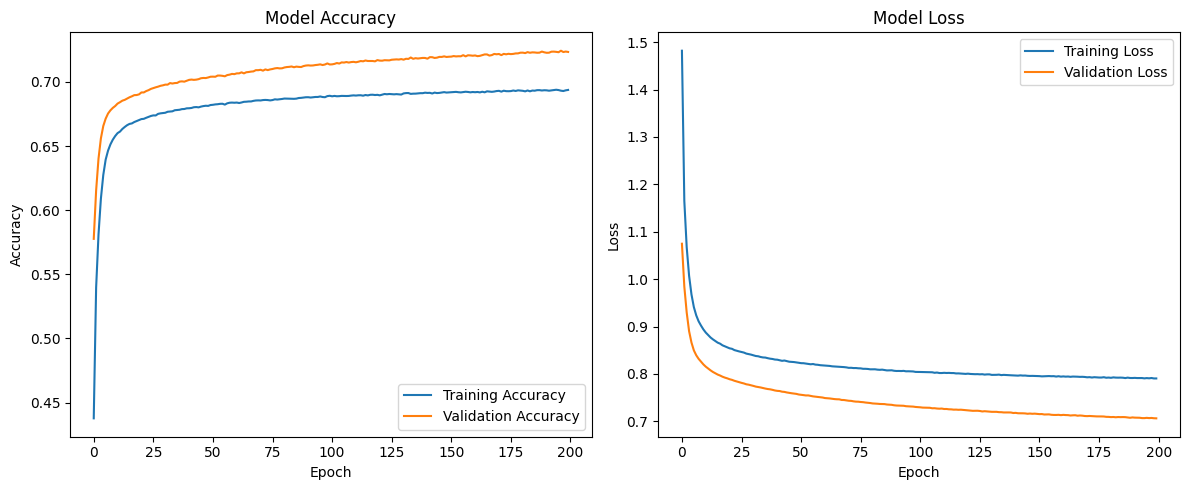



Implementing ensemble approach for improved accuracy...

Training model 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.4105 - loss: 1.7254 - val_accuracy: 0.5975 - val_loss: 1.0336
Epoch 2/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5297 - loss: 1.2190 - val_accuracy: 0.6193 - val_loss: 0.9794
Epoch 3/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5673 - loss: 1.1028 - val_accuracy: 0.6344 - val_loss: 0.9433
Epoch 4/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5932 - loss: 1.0372 - val_accuracy: 0.6461 - val_loss: 0.9133
Epoch 5/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6116 - loss: 0.9951 - val_accuracy: 0.6568 - val_loss: 0.8881
Epoch 6/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6257 - loss: 0.9628 - val_accuracy: 0.6632 - val_loss: 0.8662
Epoch 7/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6374 - loss: 0.9373 - val_accuracy: 0.6690 - val_loss: 0.8507
Epoch 8/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6444 - loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4101 - loss: 1.6124
Epoch 1: val_accuracy improved from -inf to 0.60495, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.4101 - loss: 1.6122 - val_accuracy: 0.6049 - val_loss: 1.0228 - learning_rate: 5.0000e-05
Epoch 2/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5626 - loss: 1.1312
Epoch 2: val_accuracy improved from 0.60495 to 0.62876, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5626 - loss: 1.1312 - val_accuracy: 0.6288 - val_loss: 0.9585 - learning_rate: 5.0000e-05
Epoch 3/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5928 - loss: 1.0510
Epoch 3: val_accuracy improved from 0.62876 to 0.64162, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5929 - loss: 1.0508 - val_accuracy: 0.6416 - val_loss: 0.9234 - learning_rate: 5.0000e-05
Epoch 4/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6113 - loss: 1.0049
Epoch 4: val_accuracy improved from 0.64162 to 0.65020, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6113 - loss: 1.0049 - val_accuracy: 0.6502 - val_loss: 0.9013 - learning_rate: 5.0000e-05
Epoch 5/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6223 - loss: 0.9772
Epoch 5: val_accuracy improved from 0.65020 to 0.65591, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6223 - loss: 0.9772 - val_accuracy: 0.6559 - val_loss: 0.8848 - learning_rate: 5.0000e-05
Epoch 6/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6318 - loss: 0.9565
Epoch 6: val_accuracy improved from 0.65591 to 0.65923, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6318 - loss: 0.9565 - val_accuracy: 0.6592 - val_loss: 0.8731 - learning_rate: 5.0000e-05
Epoch 7/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6370 - loss: 0.9406
Epoch 7: val_accuracy improved from 0.65923 to 0.66380, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6370 - loss: 0.9405 - val_accuracy: 0.6638 - val_loss: 0.8632 - learning_rate: 5.0000e-05
Epoch 8/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6422 - loss: 0.9278
Epoch 8: val_accuracy improved from 0.66380 to 0.66708, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6422 - loss: 0.9278 - val_accuracy: 0.6671 - val_loss: 0.8543 - learning_rate: 5.0000e-05
Epoch 9/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6462 - loss: 0.9171
Epoch 9: val_accuracy improved from 0.66708 to 0.66928, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6462 - loss: 0.9171 - val_accuracy: 0.6693 - val_loss: 0.8473 - learning_rate: 5.0000e-05
Epoch 10/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 0.9087
Epoch 10: val_accuracy improved from 0.66928 to 0.67180, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6490 - loss: 0.9087 - val_accuracy: 0.6718 - val_loss: 0.8409 - learning_rate: 5.0000e-05
Epoch 11/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6525 - loss: 0.9007
Epoch 11: val_accuracy improved from 0.67180 to 0.67388, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6525 - loss: 0.9007 - val_accuracy: 0.6739 - val_loss: 0.8346 - learning_rate: 5.0000e-05
Epoch 12/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6551 - loss: 0.8938
Epoch 12: val_accuracy improved from 0.67388 to 0.67596, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6551 - loss: 0.8938 - val_accuracy: 0.6760 - val_loss: 0.8292 - learning_rate: 5.0000e-05
Epoch 13/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6571 - loss: 0.8881
Epoch 13: val_accuracy improved from 0.67596 to 0.67740, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6571 - loss: 0.8881 - val_accuracy: 0.6774 - val_loss: 0.8241 - learning_rate: 5.0000e-05
Epoch 14/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6582 - loss: 0.8831
Epoch 14: val_accuracy improved from 0.67740 to 0.67921, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6582 - loss: 0.8831 - val_accuracy: 0.6792 - val_loss: 0.8196 - learning_rate: 5.0000e-05
Epoch 15/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6610 - loss: 0.8775
Epoch 15: val_accuracy improved from 0.67921 to 0.68088, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6610 - loss: 0.8775 - val_accuracy: 0.6809 - val_loss: 0.8151 - learning_rate: 5.0000e-05
Epoch 16/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6626 - loss: 0.8734
Epoch 16: val_accuracy improved from 0.68088 to 0.68292, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6626 - loss: 0.8734 - val_accuracy: 0.6829 - val_loss: 0.8105 - learning_rate: 5.0000e-05
Epoch 17/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6649 - loss: 0.8688
Epoch 17: val_accuracy improved from 0.68292 to 0.68490, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6649 - loss: 0.8688 - val_accuracy: 0.6849 - val_loss: 0.8065 - learning_rate: 5.0000e-05
Epoch 18/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6659 - loss: 0.8638
Epoch 18: val_accuracy improved from 0.68490 to 0.68629, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6659 - loss: 0.8638 - val_accuracy: 0.6863 - val_loss: 0.8023 - learning_rate: 5.0000e-05
Epoch 19/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 0.8607
Epoch 19: val_accuracy improved from 0.68629 to 0.68781, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6669 - loss: 0.8607 - val_accuracy: 0.6878 - val_loss: 0.7988 - learning_rate: 5.0000e-05
Epoch 20/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6687 - loss: 0.8559
Epoch 20: val_accuracy improved from 0.68781 to 0.68940, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6687 - loss: 0.8559 - val_accuracy: 0.6894 - val_loss: 0.7955 - learning_rate: 5.0000e-05
Epoch 21/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6702 - loss: 0.8531
Epoch 21: val_accuracy improved from 0.68940 to 0.69034, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6702 - loss: 0.8531 - val_accuracy: 0.6903 - val_loss: 0.7917 - learning_rate: 5.0000e-05
Epoch 22/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6713 - loss: 0.8506
Epoch 22: val_accuracy improved from 0.69034 to 0.69174, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6712 - loss: 0.8506 - val_accuracy: 0.6917 - val_loss: 0.7887 - learning_rate: 5.0000e-05
Epoch 23/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6727 - loss: 0.8469
Epoch 23: val_accuracy improved from 0.69174 to 0.69298, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6727 - loss: 0.8469 - val_accuracy: 0.6930 - val_loss: 0.7855 - learning_rate: 5.0000e-05
Epoch 24/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6734 - loss: 0.8435
Epoch 24: val_accuracy improved from 0.69298 to 0.69473, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6734 - loss: 0.8435 - val_accuracy: 0.6947 - val_loss: 0.7821 - learning_rate: 5.0000e-05
Epoch 25/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6739 - loss: 0.8419
Epoch 25: val_accuracy improved from 0.69473 to 0.69604, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6739 - loss: 0.8419 - val_accuracy: 0.6960 - val_loss: 0.7793 - learning_rate: 5.0000e-05
Epoch 26/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6754 - loss: 0.8384
Epoch 26: val_accuracy improved from 0.69604 to 0.69700, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6754 - loss: 0.8384 - val_accuracy: 0.6970 - val_loss: 0.7765 - learning_rate: 5.0000e-05
Epoch 27/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.8350
Epoch 27: val_accuracy improved from 0.69700 to 0.69843, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6771 - loss: 0.8351 - val_accuracy: 0.6984 - val_loss: 0.7735 - learning_rate: 5.0000e-05
Epoch 28/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6775 - loss: 0.8337
Epoch 28: val_accuracy improved from 0.69843 to 0.69918, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6775 - loss: 0.8338 - val_accuracy: 0.6992 - val_loss: 0.7706 - learning_rate: 5.0000e-05
Epoch 29/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6783 - loss: 0.8308
Epoch 29: val_accuracy improved from 0.69918 to 0.70060, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6783 - loss: 0.8308 - val_accuracy: 0.7006 - val_loss: 0.7678 - learning_rate: 5.0000e-05
Epoch 30/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6791 - loss: 0.8286
Epoch 30: val_accuracy improved from 0.70060 to 0.70176, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6791 - loss: 0.8286 - val_accuracy: 0.7018 - val_loss: 0.7651 - learning_rate: 5.0000e-05
Epoch 31/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6803 - loss: 0.8259
Epoch 31: val_accuracy improved from 0.70176 to 0.70296, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6803 - loss: 0.8259 - val_accuracy: 0.7030 - val_loss: 0.7623 - learning_rate: 5.0000e-05
Epoch 32/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6807 - loss: 0.8240
Epoch 32: val_accuracy improved from 0.70296 to 0.70360, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6807 - loss: 0.8241 - val_accuracy: 0.7036 - val_loss: 0.7599 - learning_rate: 5.0000e-05
Epoch 33/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6809 - loss: 0.8226
Epoch 33: val_accuracy improved from 0.70360 to 0.70485, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6809 - loss: 0.8226 - val_accuracy: 0.7049 - val_loss: 0.7569 - learning_rate: 5.0000e-05
Epoch 34/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.8199
Epoch 34: val_accuracy improved from 0.70485 to 0.70618, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6822 - loss: 0.8199 - val_accuracy: 0.7062 - val_loss: 0.7545 - learning_rate: 5.0000e-05
Epoch 35/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6831 - loss: 0.8174
Epoch 35: val_accuracy improved from 0.70618 to 0.70667, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6831 - loss: 0.8174 - val_accuracy: 0.7067 - val_loss: 0.7522 - learning_rate: 5.0000e-05
Epoch 36/300
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6842 - loss: 0.8160
Epoch 36: val_accuracy improved from 0.70667 to 0.70757, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6842 - loss: 0.8160 - val_accuracy: 0.7076 - val_loss: 0.7496 - learning_rate: 5.0000e-05
Epoch 37/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6844 - loss: 0.8135
Epoch 37: val_accuracy improved from 0.70757 to 0.70925, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6844 - loss: 0.8135 - val_accuracy: 0.7092 - val_loss: 0.7473 - learning_rate: 5.0000e-05
Epoch 38/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6856 - loss: 0.8117
Epoch 38: val_accuracy improved from 0.70925 to 0.71005, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6855 - loss: 0.8117 - val_accuracy: 0.7101 - val_loss: 0.7449 - learning_rate: 5.0000e-05
Epoch 39/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6865 - loss: 0.8097
Epoch 39: val_accuracy improved from 0.71005 to 0.71094, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6865 - loss: 0.8097 - val_accuracy: 0.7109 - val_loss: 0.7423 - learning_rate: 5.0000e-05
Epoch 40/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6871 - loss: 0.8083
Epoch 40: val_accuracy improved from 0.71094 to 0.71203, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6871 - loss: 0.8083 - val_accuracy: 0.7120 - val_loss: 0.7400 - learning_rate: 5.0000e-05
Epoch 41/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6872 - loss: 0.8065
Epoch 41: val_accuracy improved from 0.71203 to 0.71297, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6872 - loss: 0.8065 - val_accuracy: 0.7130 - val_loss: 0.7379 - learning_rate: 5.0000e-05
Epoch 42/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6887 - loss: 0.8044
Epoch 42: val_accuracy improved from 0.71297 to 0.71352, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6887 - loss: 0.8044 - val_accuracy: 0.7135 - val_loss: 0.7356 - learning_rate: 5.0000e-05
Epoch 43/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6897 - loss: 0.8025
Epoch 43: val_accuracy improved from 0.71352 to 0.71452, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6897 - loss: 0.8025 - val_accuracy: 0.7145 - val_loss: 0.7332 - learning_rate: 5.0000e-05
Epoch 44/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6899 - loss: 0.8011
Epoch 44: val_accuracy improved from 0.71452 to 0.71512, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6898 - loss: 0.8011 - val_accuracy: 0.7151 - val_loss: 0.7308 - learning_rate: 5.0000e-05
Epoch 45/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.7987
Epoch 45: val_accuracy improved from 0.71512 to 0.71567, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6904 - loss: 0.7987 - val_accuracy: 0.7157 - val_loss: 0.7287 - learning_rate: 5.0000e-05
Epoch 46/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6915 - loss: 0.7975
Epoch 46: val_accuracy improved from 0.71567 to 0.71670, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6915 - loss: 0.7975 - val_accuracy: 0.7167 - val_loss: 0.7262 - learning_rate: 5.0000e-05
Epoch 47/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6915 - loss: 0.7956
Epoch 47: val_accuracy improved from 0.71670 to 0.71772, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6915 - loss: 0.7956 - val_accuracy: 0.7177 - val_loss: 0.7242 - learning_rate: 5.0000e-05
Epoch 48/300
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6922 - loss: 0.7940
Epoch 48: val_accuracy improved from 0.71772 to 0.71893, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6921 - loss: 0.7940 - val_accuracy: 0.7189 - val_loss: 0.7218 - learning_rate: 5.0000e-05
Epoch 49/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6925 - loss: 0.7929
Epoch 49: val_accuracy improved from 0.71893 to 0.71926, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6925 - loss: 0.7929 - val_accuracy: 0.7193 - val_loss: 0.7196 - learning_rate: 5.0000e-05
Epoch 50/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6933 - loss: 0.7910
Epoch 50: val_accuracy improved from 0.71926 to 0.72058, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6933 - loss: 0.7910 - val_accuracy: 0.7206 - val_loss: 0.7175 - learning_rate: 5.0000e-05
Epoch 51/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6939 - loss: 0.7895
Epoch 51: val_accuracy improved from 0.72058 to 0.72120, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6939 - loss: 0.7895 - val_accuracy: 0.7212 - val_loss: 0.7151 - learning_rate: 5.0000e-05
Epoch 52/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6944 - loss: 0.7886
Epoch 52: val_accuracy improved from 0.72120 to 0.72177, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6944 - loss: 0.7886 - val_accuracy: 0.7218 - val_loss: 0.7133 - learning_rate: 5.0000e-05
Epoch 53/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6947 - loss: 0.7865
Epoch 53: val_accuracy improved from 0.72177 to 0.72222, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6947 - loss: 0.7865 - val_accuracy: 0.7222 - val_loss: 0.7111 - learning_rate: 5.0000e-05
Epoch 54/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6955 - loss: 0.7859
Epoch 54: val_accuracy improved from 0.72222 to 0.72366, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6955 - loss: 0.7859 - val_accuracy: 0.7237 - val_loss: 0.7086 - learning_rate: 5.0000e-05
Epoch 55/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6960 - loss: 0.7836
Epoch 55: val_accuracy improved from 0.72366 to 0.72473, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6960 - loss: 0.7836 - val_accuracy: 0.7247 - val_loss: 0.7062 - learning_rate: 5.0000e-05
Epoch 56/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6960 - loss: 0.7834
Epoch 56: val_accuracy improved from 0.72473 to 0.72596, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6960 - loss: 0.7834 - val_accuracy: 0.7260 - val_loss: 0.7044 - learning_rate: 5.0000e-05
Epoch 57/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6970 - loss: 0.7804
Epoch 57: val_accuracy improved from 0.72596 to 0.72709, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6970 - loss: 0.7804 - val_accuracy: 0.7271 - val_loss: 0.7019 - learning_rate: 5.0000e-05
Epoch 58/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss: 0.7799
Epoch 58: val_accuracy improved from 0.72709 to 0.72766, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6968 - loss: 0.7799 - val_accuracy: 0.7277 - val_loss: 0.6997 - learning_rate: 5.0000e-05
Epoch 59/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6984 - loss: 0.7782
Epoch 59: val_accuracy improved from 0.72766 to 0.72857, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6984 - loss: 0.7782 - val_accuracy: 0.7286 - val_loss: 0.6976 - learning_rate: 5.0000e-05
Epoch 60/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6981 - loss: 0.7775
Epoch 60: val_accuracy improved from 0.72857 to 0.72947, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6981 - loss: 0.7775 - val_accuracy: 0.7295 - val_loss: 0.6957 - learning_rate: 5.0000e-05
Epoch 61/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6991 - loss: 0.7745
Epoch 61: val_accuracy did not improve from 0.72947
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6991 - loss: 0.7745 - val_accuracy: 0.7294 - val_loss: 0.6941 - learning_rate: 5.0000e-05
Epoch 62/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6995 - loss: 0.7741
Epoch 62: val_accuracy improved from 0.72947 to 0.73078, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6995 - loss: 0.7741 - val_accuracy: 0.7308 - val_loss: 0.6913 - learning_rate: 5.0000e-05
Epoch 63/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6998 - loss: 0.7727
Epoch 63: val_accuracy improved from 0.73078 to 0.73164, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6998 - loss: 0.7727 - val_accuracy: 0.7316 - val_loss: 0.6894 - learning_rate: 5.0000e-05
Epoch 64/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7004 - loss: 0.7711
Epoch 64: val_accuracy improved from 0.73164 to 0.73206, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7004 - loss: 0.7712 - val_accuracy: 0.7321 - val_loss: 0.6876 - learning_rate: 5.0000e-05
Epoch 65/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7010 - loss: 0.7703
Epoch 65: val_accuracy improved from 0.73206 to 0.73326, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7010 - loss: 0.7703 - val_accuracy: 0.7333 - val_loss: 0.6858 - learning_rate: 5.0000e-05
Epoch 66/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7017 - loss: 0.7689
Epoch 66: val_accuracy improved from 0.73326 to 0.73366, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7017 - loss: 0.7689 - val_accuracy: 0.7337 - val_loss: 0.6836 - learning_rate: 5.0000e-05
Epoch 67/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7016 - loss: 0.7682
Epoch 67: val_accuracy improved from 0.73366 to 0.73455, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7016 - loss: 0.7682 - val_accuracy: 0.7346 - val_loss: 0.6814 - learning_rate: 5.0000e-05
Epoch 68/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7031 - loss: 0.7658
Epoch 68: val_accuracy improved from 0.73455 to 0.73583, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7031 - loss: 0.7658 - val_accuracy: 0.7358 - val_loss: 0.6789 - learning_rate: 5.0000e-05
Epoch 69/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7033 - loss: 0.7645
Epoch 69: val_accuracy improved from 0.73583 to 0.73633, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7033 - loss: 0.7646 - val_accuracy: 0.7363 - val_loss: 0.6776 - learning_rate: 5.0000e-05
Epoch 70/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.7634
Epoch 70: val_accuracy improved from 0.73633 to 0.73730, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7036 - loss: 0.7634 - val_accuracy: 0.7373 - val_loss: 0.6754 - learning_rate: 5.0000e-05
Epoch 71/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7040 - loss: 0.7625
Epoch 71: val_accuracy improved from 0.73730 to 0.73766, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7040 - loss: 0.7625 - val_accuracy: 0.7377 - val_loss: 0.6732 - learning_rate: 5.0000e-05
Epoch 72/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7049 - loss: 0.7614
Epoch 72: val_accuracy improved from 0.73766 to 0.73912, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7049 - loss: 0.7614 - val_accuracy: 0.7391 - val_loss: 0.6718 - learning_rate: 5.0000e-05
Epoch 73/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7050 - loss: 0.7596
Epoch 73: val_accuracy improved from 0.73912 to 0.73919, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7050 - loss: 0.7596 - val_accuracy: 0.7392 - val_loss: 0.6700 - learning_rate: 5.0000e-05
Epoch 74/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7055 - loss: 0.7584
Epoch 74: val_accuracy improved from 0.73919 to 0.74028, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7055 - loss: 0.7584 - val_accuracy: 0.7403 - val_loss: 0.6678 - learning_rate: 5.0000e-05
Epoch 75/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.7570
Epoch 75: val_accuracy improved from 0.74028 to 0.74129, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7062 - loss: 0.7570 - val_accuracy: 0.7413 - val_loss: 0.6656 - learning_rate: 5.0000e-05
Epoch 76/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.7571
Epoch 76: val_accuracy improved from 0.74129 to 0.74164, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7062 - loss: 0.7571 - val_accuracy: 0.7416 - val_loss: 0.6641 - learning_rate: 5.0000e-05
Epoch 77/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7072 - loss: 0.7549
Epoch 77: val_accuracy improved from 0.74164 to 0.74282, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7072 - loss: 0.7549 - val_accuracy: 0.7428 - val_loss: 0.6625 - learning_rate: 5.0000e-05
Epoch 78/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7076 - loss: 0.7533
Epoch 78: val_accuracy improved from 0.74282 to 0.74302, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7076 - loss: 0.7534 - val_accuracy: 0.7430 - val_loss: 0.6605 - learning_rate: 5.0000e-05
Epoch 79/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 0.7529
Epoch 79: val_accuracy improved from 0.74302 to 0.74407, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7074 - loss: 0.7529 - val_accuracy: 0.7441 - val_loss: 0.6582 - learning_rate: 5.0000e-05
Epoch 80/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7082 - loss: 0.7517
Epoch 80: val_accuracy improved from 0.74407 to 0.74515, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7082 - loss: 0.7517 - val_accuracy: 0.7451 - val_loss: 0.6566 - learning_rate: 5.0000e-05
Epoch 81/300
1155/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7080 - loss: 0.7514
Epoch 81: val_accuracy improved from 0.74515 to 0.74582, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7080 - loss: 0.7515 - val_accuracy: 0.7458 - val_loss: 0.6543 - learning_rate: 5.0000e-05
Epoch 82/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7092 - loss: 0.7504
Epoch 82: val_accuracy improved from 0.74582 to 0.74774, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7092 - loss: 0.7504 - val_accuracy: 0.7477 - val_loss: 0.6524 - learning_rate: 5.0000e-05
Epoch 83/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7096 - loss: 0.7481
Epoch 83: val_accuracy improved from 0.74774 to 0.74812, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7096 - loss: 0.7481 - val_accuracy: 0.7481 - val_loss: 0.6508 - learning_rate: 5.0000e-05
Epoch 84/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7095 - loss: 0.7472
Epoch 84: val_accuracy improved from 0.74812 to 0.74849, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7095 - loss: 0.7472 - val_accuracy: 0.7485 - val_loss: 0.6490 - learning_rate: 5.0000e-05
Epoch 85/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7103 - loss: 0.7472
Epoch 85: val_accuracy improved from 0.74849 to 0.74910, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7103 - loss: 0.7472 - val_accuracy: 0.7491 - val_loss: 0.6470 - learning_rate: 5.0000e-05
Epoch 86/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7108 - loss: 0.7453
Epoch 86: val_accuracy improved from 0.74910 to 0.74993, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7108 - loss: 0.7453 - val_accuracy: 0.7499 - val_loss: 0.6455 - learning_rate: 5.0000e-05
Epoch 87/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7106 - loss: 0.7448
Epoch 87: val_accuracy improved from 0.74993 to 0.75106, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7106 - loss: 0.7448 - val_accuracy: 0.7511 - val_loss: 0.6438 - learning_rate: 5.0000e-05
Epoch 88/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.7436
Epoch 88: val_accuracy improved from 0.75106 to 0.75153, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7113 - loss: 0.7436 - val_accuracy: 0.7515 - val_loss: 0.6421 - learning_rate: 5.0000e-05
Epoch 89/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.7433
Epoch 89: val_accuracy improved from 0.75153 to 0.75223, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7113 - loss: 0.7433 - val_accuracy: 0.7522 - val_loss: 0.6402 - learning_rate: 5.0000e-05
Epoch 90/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7125 - loss: 0.7408
Epoch 90: val_accuracy improved from 0.75223 to 0.75246, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7125 - loss: 0.7408 - val_accuracy: 0.7525 - val_loss: 0.6383 - learning_rate: 5.0000e-05
Epoch 91/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.7408
Epoch 91: val_accuracy improved from 0.75246 to 0.75261, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7125 - loss: 0.7408 - val_accuracy: 0.7526 - val_loss: 0.6367 - learning_rate: 5.0000e-05
Epoch 92/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.7395
Epoch 92: val_accuracy improved from 0.75261 to 0.75388, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7126 - loss: 0.7395 - val_accuracy: 0.7539 - val_loss: 0.6351 - learning_rate: 5.0000e-05
Epoch 93/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7130 - loss: 0.7385
Epoch 93: val_accuracy improved from 0.75388 to 0.75435, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7130 - loss: 0.7385 - val_accuracy: 0.7543 - val_loss: 0.6329 - learning_rate: 5.0000e-05
Epoch 94/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7137 - loss: 0.7377
Epoch 94: val_accuracy improved from 0.75435 to 0.75550, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7137 - loss: 0.7377 - val_accuracy: 0.7555 - val_loss: 0.6318 - learning_rate: 5.0000e-05
Epoch 95/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7141 - loss: 0.7365
Epoch 95: val_accuracy improved from 0.75550 to 0.75616, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7141 - loss: 0.7365 - val_accuracy: 0.7562 - val_loss: 0.6300 - learning_rate: 5.0000e-05
Epoch 96/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7148 - loss: 0.7347
Epoch 96: val_accuracy improved from 0.75616 to 0.75673, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7148 - loss: 0.7347 - val_accuracy: 0.7567 - val_loss: 0.6278 - learning_rate: 5.0000e-05
Epoch 97/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7141 - loss: 0.7343
Epoch 97: val_accuracy improved from 0.75673 to 0.75703, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7141 - loss: 0.7343 - val_accuracy: 0.7570 - val_loss: 0.6264 - learning_rate: 5.0000e-05
Epoch 98/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7148 - loss: 0.7332
Epoch 98: val_accuracy improved from 0.75703 to 0.75812, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7148 - loss: 0.7332 - val_accuracy: 0.7581 - val_loss: 0.6250 - learning_rate: 5.0000e-05
Epoch 99/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7159 - loss: 0.7322
Epoch 99: val_accuracy improved from 0.75812 to 0.75879, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7159 - loss: 0.7322 - val_accuracy: 0.7588 - val_loss: 0.6234 - learning_rate: 5.0000e-05
Epoch 100/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7152 - loss: 0.7323
Epoch 100: val_accuracy improved from 0.75879 to 0.75921, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7152 - loss: 0.7323 - val_accuracy: 0.7592 - val_loss: 0.6215 - learning_rate: 5.0000e-05
Epoch 101/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7159 - loss: 0.7300
Epoch 101: val_accuracy improved from 0.75921 to 0.76026, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7159 - loss: 0.7300 - val_accuracy: 0.7603 - val_loss: 0.6198 - learning_rate: 5.0000e-05
Epoch 102/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7169 - loss: 0.7293
Epoch 102: val_accuracy improved from 0.76026 to 0.76090, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7169 - loss: 0.7293 - val_accuracy: 0.7609 - val_loss: 0.6175 - learning_rate: 5.0000e-05
Epoch 103/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7172 - loss: 0.7287
Epoch 103: val_accuracy improved from 0.76090 to 0.76171, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7172 - loss: 0.7287 - val_accuracy: 0.7617 - val_loss: 0.6162 - learning_rate: 5.0000e-05
Epoch 104/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7178 - loss: 0.7268
Epoch 104: val_accuracy improved from 0.76171 to 0.76251, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7178 - loss: 0.7268 - val_accuracy: 0.7625 - val_loss: 0.6147 - learning_rate: 5.0000e-05
Epoch 105/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7177 - loss: 0.7269
Epoch 105: val_accuracy did not improve from 0.76251
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7176 - loss: 0.7269 - val_accuracy: 0.7624 - val_loss: 0.6132 - learning_rate: 5.0000e-05
Epoch 106/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7189 - loss: 0.7258
Epoch 106: val_accuracy improved from 0.76251 to 0.76371, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7188 - loss: 0.7258 - val_accuracy: 0.7637 - val_loss: 0.6115 - learning_rate: 5.0000e-05
Epoch 107/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7180 - loss: 0.7256
Epoch 107: val_accuracy improved from 0.76371 to 0.76386, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7180 - loss: 0.7256 - val_accuracy: 0.7639 - val_loss: 0.6105 - learning_rate: 5.0000e-05
Epoch 108/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7184 - loss: 0.7243
Epoch 108: val_accuracy improved from 0.76386 to 0.76494, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7184 - loss: 0.7243 - val_accuracy: 0.7649 - val_loss: 0.6088 - learning_rate: 5.0000e-05
Epoch 109/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7187 - loss: 0.7244
Epoch 109: val_accuracy improved from 0.76494 to 0.76557, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7187 - loss: 0.7244 - val_accuracy: 0.7656 - val_loss: 0.6080 - learning_rate: 5.0000e-05
Epoch 110/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7190 - loss: 0.7229
Epoch 110: val_accuracy improved from 0.76557 to 0.76652, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7190 - loss: 0.7229 - val_accuracy: 0.7665 - val_loss: 0.6058 - learning_rate: 5.0000e-05
Epoch 111/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 0.7216
Epoch 111: val_accuracy improved from 0.76652 to 0.76690, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7198 - loss: 0.7216 - val_accuracy: 0.7669 - val_loss: 0.6044 - learning_rate: 5.0000e-05
Epoch 112/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7210 - loss: 0.7201
Epoch 112: val_accuracy improved from 0.76690 to 0.76714, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7210 - loss: 0.7201 - val_accuracy: 0.7671 - val_loss: 0.6026 - learning_rate: 5.0000e-05
Epoch 113/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 0.7203
Epoch 113: val_accuracy improved from 0.76714 to 0.76797, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7202 - loss: 0.7203 - val_accuracy: 0.7680 - val_loss: 0.6013 - learning_rate: 5.0000e-05
Epoch 114/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 0.7203
Epoch 114: val_accuracy improved from 0.76797 to 0.76905, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7198 - loss: 0.7203 - val_accuracy: 0.7691 - val_loss: 0.5996 - learning_rate: 5.0000e-05
Epoch 115/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7208 - loss: 0.7191
Epoch 115: val_accuracy improved from 0.76905 to 0.77017, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7208 - loss: 0.7191 - val_accuracy: 0.7702 - val_loss: 0.5983 - learning_rate: 5.0000e-05
Epoch 116/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7216 - loss: 0.7175
Epoch 116: val_accuracy did not improve from 0.77017
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7216 - loss: 0.7175 - val_accuracy: 0.7695 - val_loss: 0.5973 - learning_rate: 5.0000e-05
Epoch 117/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 0.7175
Epoch 117: val_accuracy improved from 0.77017 to 0.77095, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7214 - loss: 0.7175 - val_accuracy: 0.7709 - val_loss: 0.5962 - learning_rate: 5.0000e-05
Epoch 118/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7218 - loss: 0.7175
Epoch 118: val_accuracy improved from 0.77095 to 0.77133, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7217 - loss: 0.7175 - val_accuracy: 0.7713 - val_loss: 0.5948 - learning_rate: 5.0000e-05
Epoch 119/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7225 - loss: 0.7158
Epoch 119: val_accuracy improved from 0.77133 to 0.77179, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7225 - loss: 0.7158 - val_accuracy: 0.7718 - val_loss: 0.5933 - learning_rate: 5.0000e-05
Epoch 120/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7222 - loss: 0.7157
Epoch 120: val_accuracy improved from 0.77179 to 0.77207, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7222 - loss: 0.7157 - val_accuracy: 0.7721 - val_loss: 0.5922 - learning_rate: 5.0000e-05
Epoch 121/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7227 - loss: 0.7135
Epoch 121: val_accuracy improved from 0.77207 to 0.77292, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7227 - loss: 0.7135 - val_accuracy: 0.7729 - val_loss: 0.5909 - learning_rate: 5.0000e-05
Epoch 122/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7224 - loss: 0.7137
Epoch 122: val_accuracy improved from 0.77292 to 0.77417, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7224 - loss: 0.7137 - val_accuracy: 0.7742 - val_loss: 0.5898 - learning_rate: 5.0000e-05
Epoch 123/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7238 - loss: 0.7125
Epoch 123: val_accuracy did not improve from 0.77417
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7238 - loss: 0.7125 - val_accuracy: 0.7742 - val_loss: 0.5880 - learning_rate: 5.0000e-05
Epoch 124/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7239 - loss: 0.7117
Epoch 124: val_accuracy improved from 0.77417 to 0.77482, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7239 - loss: 0.7117 - val_accuracy: 0.7748 - val_loss: 0.5863 - learning_rate: 5.0000e-05
Epoch 125/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7236 - loss: 0.7110
Epoch 125: val_accuracy improved from 0.77482 to 0.77566, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7236 - loss: 0.7110 - val_accuracy: 0.7757 - val_loss: 0.5855 - learning_rate: 5.0000e-05
Epoch 126/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7240 - loss: 0.7109
Epoch 126: val_accuracy improved from 0.77566 to 0.77662, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7240 - loss: 0.7109 - val_accuracy: 0.7766 - val_loss: 0.5842 - learning_rate: 5.0000e-05
Epoch 127/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7242 - loss: 0.7097
Epoch 127: val_accuracy improved from 0.77662 to 0.77704, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7242 - loss: 0.7097 - val_accuracy: 0.7770 - val_loss: 0.5829 - learning_rate: 5.0000e-05
Epoch 128/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7253 - loss: 0.7091
Epoch 128: val_accuracy improved from 0.77704 to 0.77730, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7253 - loss: 0.7091 - val_accuracy: 0.7773 - val_loss: 0.5815 - learning_rate: 5.0000e-05
Epoch 129/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7252 - loss: 0.7070
Epoch 129: val_accuracy improved from 0.77730 to 0.77784, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7251 - loss: 0.7071 - val_accuracy: 0.7778 - val_loss: 0.5799 - learning_rate: 5.0000e-05
Epoch 130/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7254 - loss: 0.7062
Epoch 130: val_accuracy improved from 0.77784 to 0.77819, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7254 - loss: 0.7062 - val_accuracy: 0.7782 - val_loss: 0.5788 - learning_rate: 5.0000e-05
Epoch 131/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7257 - loss: 0.7072
Epoch 131: val_accuracy improved from 0.77819 to 0.77925, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7257 - loss: 0.7072 - val_accuracy: 0.7793 - val_loss: 0.5778 - learning_rate: 5.0000e-05
Epoch 132/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7254 - loss: 0.7061
Epoch 132: val_accuracy improved from 0.77925 to 0.77995, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7254 - loss: 0.7061 - val_accuracy: 0.7800 - val_loss: 0.5760 - learning_rate: 5.0000e-05
Epoch 133/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7252 - loss: 0.7060
Epoch 133: val_accuracy improved from 0.77995 to 0.78085, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7252 - loss: 0.7060 - val_accuracy: 0.7808 - val_loss: 0.5757 - learning_rate: 5.0000e-05
Epoch 134/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7261 - loss: 0.7056
Epoch 134: val_accuracy did not improve from 0.78085
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7261 - loss: 0.7056 - val_accuracy: 0.7808 - val_loss: 0.5742 - learning_rate: 5.0000e-05
Epoch 135/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7273 - loss: 0.7037
Epoch 135: val_accuracy improved from 0.78085 to 0.78168, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7273 - loss: 0.7037 - val_accuracy: 0.7817 - val_loss: 0.5725 - learning_rate: 5.0000e-05
Epoch 136/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7267 - loss: 0.7036
Epoch 136: val_accuracy did not improve from 0.78168
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7266 - loss: 0.7036 - val_accuracy: 0.7814 - val_loss: 0.5720 - learning_rate: 5.0000e-05
Epoch 137/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7269 - loss: 0.7031
Epoch 137: val_accuracy improved from 0.78168 to 0.78242, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7269 - loss: 0.7031 - val_accuracy: 0.7824 - val_loss: 0.5708 - learning_rate: 5.0000e-05
Epoch 138/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 0.7024
Epoch 138: val_accuracy did not improve from 0.78242
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7274 - loss: 0.7024 - val_accuracy: 0.7823 - val_loss: 0.5702 - learning_rate: 5.0000e-05
Epoch 139/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 0.7018
Epoch 139: val_accuracy improved from 0.78242 to 0.78349, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7274 - loss: 0.7018 - val_accuracy: 0.7835 - val_loss: 0.5678 - learning_rate: 5.0000e-05
Epoch 140/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7276 - loss: 0.7010
Epoch 140: val_accuracy improved from 0.78349 to 0.78379, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7276 - loss: 0.7010 - val_accuracy: 0.7838 - val_loss: 0.5677 - learning_rate: 5.0000e-05
Epoch 141/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7288 - loss: 0.6999
Epoch 141: val_accuracy improved from 0.78379 to 0.78471, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7288 - loss: 0.6999 - val_accuracy: 0.7847 - val_loss: 0.5657 - learning_rate: 5.0000e-05
Epoch 142/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7285 - loss: 0.6996
Epoch 142: val_accuracy did not improve from 0.78471
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7285 - loss: 0.6997 - val_accuracy: 0.7845 - val_loss: 0.5649 - learning_rate: 5.0000e-05
Epoch 143/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7280 - loss: 0.6997
Epoch 143: val_accuracy improved from 0.78471 to 0.78597, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7279 - loss: 0.6997 - val_accuracy: 0.7860 - val_loss: 0.5628 - learning_rate: 5.0000e-05
Epoch 144/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7292 - loss: 0.6985
Epoch 144: val_accuracy did not improve from 0.78597
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7291 - loss: 0.6986 - val_accuracy: 0.7858 - val_loss: 0.5620 - learning_rate: 5.0000e-05
Epoch 145/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7285 - loss: 0.6982
Epoch 145: val_accuracy improved from 0.78597 to 0.78636, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7285 - loss: 0.6982 - val_accuracy: 0.7864 - val_loss: 0.5609 - learning_rate: 5.0000e-05
Epoch 146/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7297 - loss: 0.6980
Epoch 146: val_accuracy improved from 0.78636 to 0.78720, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7297 - loss: 0.6980 - val_accuracy: 0.7872 - val_loss: 0.5601 - learning_rate: 5.0000e-05
Epoch 147/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7298 - loss: 0.6971
Epoch 147: val_accuracy improved from 0.78720 to 0.78773, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7298 - loss: 0.6971 - val_accuracy: 0.7877 - val_loss: 0.5592 - learning_rate: 5.0000e-05
Epoch 148/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7300 - loss: 0.6965
Epoch 148: val_accuracy improved from 0.78773 to 0.78835, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7300 - loss: 0.6965 - val_accuracy: 0.7884 - val_loss: 0.5575 - learning_rate: 5.0000e-05
Epoch 149/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7295 - loss: 0.6966
Epoch 149: val_accuracy improved from 0.78835 to 0.78882, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7295 - loss: 0.6966 - val_accuracy: 0.7888 - val_loss: 0.5561 - learning_rate: 5.0000e-05
Epoch 150/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7301 - loss: 0.6957
Epoch 150: val_accuracy improved from 0.78882 to 0.78931, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7301 - loss: 0.6957 - val_accuracy: 0.7893 - val_loss: 0.5564 - learning_rate: 5.0000e-05
Epoch 151/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7305 - loss: 0.6944
Epoch 151: val_accuracy did not improve from 0.78931
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7304 - loss: 0.6944 - val_accuracy: 0.7892 - val_loss: 0.5546 - learning_rate: 5.0000e-05
Epoch 152/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7311 - loss: 0.6947
Epoch 152: val_accuracy improved from 0.78931 to 0.79041, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7311 - loss: 0.6947 - val_accuracy: 0.7904 - val_loss: 0.5539 - learning_rate: 5.0000e-05
Epoch 153/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7314 - loss: 0.6929
Epoch 153: val_accuracy improved from 0.79041 to 0.79077, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7314 - loss: 0.6930 - val_accuracy: 0.7908 - val_loss: 0.5528 - learning_rate: 5.0000e-05
Epoch 154/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7313 - loss: 0.6927
Epoch 154: val_accuracy improved from 0.79077 to 0.79123, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7313 - loss: 0.6928 - val_accuracy: 0.7912 - val_loss: 0.5520 - learning_rate: 5.0000e-05
Epoch 155/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7319 - loss: 0.6922
Epoch 155: val_accuracy improved from 0.79123 to 0.79171, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7319 - loss: 0.6922 - val_accuracy: 0.7917 - val_loss: 0.5507 - learning_rate: 5.0000e-05
Epoch 156/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7317 - loss: 0.6926
Epoch 156: val_accuracy improved from 0.79171 to 0.79213, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7317 - loss: 0.6926 - val_accuracy: 0.7921 - val_loss: 0.5502 - learning_rate: 5.0000e-05
Epoch 157/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7318 - loss: 0.6915
Epoch 157: val_accuracy improved from 0.79213 to 0.79242, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7318 - loss: 0.6915 - val_accuracy: 0.7924 - val_loss: 0.5497 - learning_rate: 5.0000e-05
Epoch 158/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7320 - loss: 0.6912
Epoch 158: val_accuracy improved from 0.79242 to 0.79269, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7320 - loss: 0.6912 - val_accuracy: 0.7927 - val_loss: 0.5486 - learning_rate: 5.0000e-05
Epoch 159/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7325 - loss: 0.6905
Epoch 159: val_accuracy improved from 0.79269 to 0.79290, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7325 - loss: 0.6905 - val_accuracy: 0.7929 - val_loss: 0.5478 - learning_rate: 5.0000e-05
Epoch 160/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7331 - loss: 0.6898
Epoch 160: val_accuracy improved from 0.79290 to 0.79329, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7331 - loss: 0.6898 - val_accuracy: 0.7933 - val_loss: 0.5462 - learning_rate: 5.0000e-05
Epoch 161/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7320 - loss: 0.6900
Epoch 161: val_accuracy improved from 0.79329 to 0.79386, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7320 - loss: 0.6900 - val_accuracy: 0.7939 - val_loss: 0.5460 - learning_rate: 5.0000e-05
Epoch 162/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7323 - loss: 0.6899
Epoch 162: val_accuracy improved from 0.79386 to 0.79472, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7323 - loss: 0.6899 - val_accuracy: 0.7947 - val_loss: 0.5447 - learning_rate: 5.0000e-05
Epoch 163/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7327 - loss: 0.6898
Epoch 163: val_accuracy improved from 0.79472 to 0.79511, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7327 - loss: 0.6898 - val_accuracy: 0.7951 - val_loss: 0.5436 - learning_rate: 5.0000e-05
Epoch 164/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7334 - loss: 0.6886
Epoch 164: val_accuracy improved from 0.79511 to 0.79560, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7334 - loss: 0.6886 - val_accuracy: 0.7956 - val_loss: 0.5426 - learning_rate: 5.0000e-05
Epoch 165/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7338 - loss: 0.6872
Epoch 165: val_accuracy improved from 0.79560 to 0.79604, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7337 - loss: 0.6872 - val_accuracy: 0.7960 - val_loss: 0.5417 - learning_rate: 5.0000e-05
Epoch 166/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7337 - loss: 0.6877
Epoch 166: val_accuracy did not improve from 0.79604
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7337 - loss: 0.6877 - val_accuracy: 0.7959 - val_loss: 0.5420 - learning_rate: 5.0000e-05
Epoch 167/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7343 - loss: 0.6869
Epoch 167: val_accuracy improved from 0.79604 to 0.79702, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7343 - loss: 0.6869 - val_accuracy: 0.7970 - val_loss: 0.5400 - learning_rate: 5.0000e-05
Epoch 168/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7337 - loss: 0.6867
Epoch 168: val_accuracy improved from 0.79702 to 0.79705, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7337 - loss: 0.6867 - val_accuracy: 0.7970 - val_loss: 0.5397 - learning_rate: 5.0000e-05
Epoch 169/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7340 - loss: 0.6870
Epoch 169: val_accuracy improved from 0.79705 to 0.79716, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7340 - loss: 0.6870 - val_accuracy: 0.7972 - val_loss: 0.5384 - learning_rate: 5.0000e-05
Epoch 170/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7338 - loss: 0.6865
Epoch 170: val_accuracy improved from 0.79716 to 0.79805, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7338 - loss: 0.6865 - val_accuracy: 0.7981 - val_loss: 0.5373 - learning_rate: 5.0000e-05
Epoch 171/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7353 - loss: 0.6853
Epoch 171: val_accuracy improved from 0.79805 to 0.79824, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7353 - loss: 0.6853 - val_accuracy: 0.7982 - val_loss: 0.5376 - learning_rate: 5.0000e-05
Epoch 172/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7345 - loss: 0.6849
Epoch 172: val_accuracy did not improve from 0.79824
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7345 - loss: 0.6849 - val_accuracy: 0.7980 - val_loss: 0.5360 - learning_rate: 5.0000e-05
Epoch 173/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7353 - loss: 0.6836
Epoch 173: val_accuracy improved from 0.79824 to 0.79866, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7353 - loss: 0.6836 - val_accuracy: 0.7987 - val_loss: 0.5346 - learning_rate: 5.0000e-05
Epoch 174/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7354 - loss: 0.6838
Epoch 174: val_accuracy improved from 0.79866 to 0.79918, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7354 - loss: 0.6839 - val_accuracy: 0.7992 - val_loss: 0.5340 - learning_rate: 5.0000e-05
Epoch 175/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7359 - loss: 0.6838
Epoch 175: val_accuracy improved from 0.79918 to 0.79987, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7359 - loss: 0.6838 - val_accuracy: 0.7999 - val_loss: 0.5333 - learning_rate: 5.0000e-05
Epoch 176/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7352 - loss: 0.6829
Epoch 176: val_accuracy improved from 0.79987 to 0.80010, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7352 - loss: 0.6829 - val_accuracy: 0.8001 - val_loss: 0.5328 - learning_rate: 5.0000e-05
Epoch 177/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7353 - loss: 0.6820
Epoch 177: val_accuracy improved from 0.80010 to 0.80012, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7353 - loss: 0.6820 - val_accuracy: 0.8001 - val_loss: 0.5320 - learning_rate: 5.0000e-05
Epoch 178/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7357 - loss: 0.6827
Epoch 178: val_accuracy improved from 0.80012 to 0.80162, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7357 - loss: 0.6827 - val_accuracy: 0.8016 - val_loss: 0.5306 - learning_rate: 5.0000e-05
Epoch 179/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7360 - loss: 0.6814
Epoch 179: val_accuracy did not improve from 0.80162
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7360 - loss: 0.6814 - val_accuracy: 0.8012 - val_loss: 0.5301 - learning_rate: 5.0000e-05
Epoch 180/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.6820
Epoch 180: val_accuracy improved from 0.80162 to 0.80233, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7366 - loss: 0.6820 - val_accuracy: 0.8023 - val_loss: 0.5292 - learning_rate: 5.0000e-05
Epoch 181/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7360 - loss: 0.6813
Epoch 181: val_accuracy did not improve from 0.80233
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7360 - loss: 0.6813 - val_accuracy: 0.8021 - val_loss: 0.5275 - learning_rate: 5.0000e-05
Epoch 182/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.6802
Epoch 182: val_accuracy did not improve from 0.80233
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7366 - loss: 0.6802 - val_accuracy: 0.8020 - val_loss: 0.5285 - learning_rate: 5.0000e-05
Epoch 183/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.6802
Epoch 183: val_accuracy improved from 0.80233 to 0.80287, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7366 - loss: 0.6802 - val_accuracy: 0.8029 - val_loss: 0.5275 - learning_rate: 5.0000e-05
Epoch 184/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7372 - loss: 0.6798
Epoch 184: val_accuracy did not improve from 0.80287
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7372 - loss: 0.6798 - val_accuracy: 0.8028 - val_loss: 0.5264 - learning_rate: 5.0000e-05
Epoch 185/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7371 - loss: 0.6790
Epoch 185: val_accuracy improved from 0.80287 to 0.80429, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7371 - loss: 0.6790 - val_accuracy: 0.8043 - val_loss: 0.5251 - learning_rate: 5.0000e-05
Epoch 186/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7372 - loss: 0.6791
Epoch 186: val_accuracy did not improve from 0.80429
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7372 - loss: 0.6791 - val_accuracy: 0.8030 - val_loss: 0.5262 - learning_rate: 5.0000e-05
Epoch 187/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7376 - loss: 0.6784
Epoch 187: val_accuracy improved from 0.80429 to 0.80468, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7376 - loss: 0.6784 - val_accuracy: 0.8047 - val_loss: 0.5226 - learning_rate: 5.0000e-05
Epoch 188/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7376 - loss: 0.6777
Epoch 188: val_accuracy improved from 0.80468 to 0.80492, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7376 - loss: 0.6777 - val_accuracy: 0.8049 - val_loss: 0.5230 - learning_rate: 5.0000e-05
Epoch 189/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7368 - loss: 0.6787
Epoch 189: val_accuracy did not improve from 0.80492
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7368 - loss: 0.6787 - val_accuracy: 0.8045 - val_loss: 0.5232 - learning_rate: 5.0000e-05
Epoch 190/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7384 - loss: 0.6766
Epoch 190: val_accuracy improved from 0.80492 to 0.80513, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7384 - loss: 0.6766 - val_accuracy: 0.8051 - val_loss: 0.5219 - learning_rate: 5.0000e-05
Epoch 191/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7374 - loss: 0.6776
Epoch 191: val_accuracy improved from 0.80513 to 0.80597, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7374 - loss: 0.6776 - val_accuracy: 0.8060 - val_loss: 0.5206 - learning_rate: 5.0000e-05
Epoch 192/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7387 - loss: 0.6760
Epoch 192: val_accuracy improved from 0.80597 to 0.80637, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7387 - loss: 0.6760 - val_accuracy: 0.8064 - val_loss: 0.5199 - learning_rate: 5.0000e-05
Epoch 193/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7373 - loss: 0.6772
Epoch 193: val_accuracy did not improve from 0.80637
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7373 - loss: 0.6772 - val_accuracy: 0.8062 - val_loss: 0.5207 - learning_rate: 5.0000e-05
Epoch 194/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7383 - loss: 0.6755
Epoch 194: val_accuracy improved from 0.80637 to 0.80754, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7383 - loss: 0.6755 - val_accuracy: 0.8075 - val_loss: 0.5186 - learning_rate: 5.0000e-05
Epoch 195/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7380 - loss: 0.6760
Epoch 195: val_accuracy did not improve from 0.80754
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7380 - loss: 0.6760 - val_accuracy: 0.8073 - val_loss: 0.5189 - learning_rate: 5.0000e-05
Epoch 196/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7394 - loss: 0.6752
Epoch 196: val_accuracy improved from 0.80754 to 0.80846, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7394 - loss: 0.6752 - val_accuracy: 0.8085 - val_loss: 0.5177 - learning_rate: 5.0000e-05
Epoch 197/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7387 - loss: 0.6743
Epoch 197: val_accuracy did not improve from 0.80846
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7387 - loss: 0.6744 - val_accuracy: 0.8081 - val_loss: 0.5177 - learning_rate: 5.0000e-05
Epoch 198/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7396 - loss: 0.6734
Epoch 198: val_accuracy improved from 0.80846 to 0.80857, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7396 - loss: 0.6734 - val_accuracy: 0.8086 - val_loss: 0.5164 - learning_rate: 5.0000e-05
Epoch 199/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7399 - loss: 0.6740
Epoch 199: val_accuracy improved from 0.80857 to 0.80878, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7399 - loss: 0.6740 - val_accuracy: 0.8088 - val_loss: 0.5165 - learning_rate: 5.0000e-05
Epoch 200/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7395 - loss: 0.6736
Epoch 200: val_accuracy improved from 0.80878 to 0.80924, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7395 - loss: 0.6736 - val_accuracy: 0.8092 - val_loss: 0.5150 - learning_rate: 5.0000e-05
Epoch 201/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 0.6733
Epoch 201: val_accuracy improved from 0.80924 to 0.80952, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7392 - loss: 0.6734 - val_accuracy: 0.8095 - val_loss: 0.5145 - learning_rate: 5.0000e-05
Epoch 202/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7401 - loss: 0.6735
Epoch 202: val_accuracy improved from 0.80952 to 0.81021, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7401 - loss: 0.6735 - val_accuracy: 0.8102 - val_loss: 0.5135 - learning_rate: 5.0000e-05
Epoch 203/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7406 - loss: 0.6717
Epoch 203: val_accuracy did not improve from 0.81021
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7406 - loss: 0.6717 - val_accuracy: 0.8092 - val_loss: 0.5127 - learning_rate: 5.0000e-05
Epoch 204/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7396 - loss: 0.6725
Epoch 204: val_accuracy improved from 0.81021 to 0.81102, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7396 - loss: 0.6725 - val_accuracy: 0.8110 - val_loss: 0.5127 - learning_rate: 5.0000e-05
Epoch 205/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7402 - loss: 0.6723
Epoch 205: val_accuracy did not improve from 0.81102
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7402 - loss: 0.6723 - val_accuracy: 0.8108 - val_loss: 0.5117 - learning_rate: 5.0000e-05
Epoch 206/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7405 - loss: 0.6718
Epoch 206: val_accuracy did not improve from 0.81102
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7405 - loss: 0.6718 - val_accuracy: 0.8110 - val_loss: 0.5113 - learning_rate: 5.0000e-05
Epoch 207/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7403 - loss: 0.6716
Epoch 207: val_accuracy improved from 0.81102 to 0.81141, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7403 - loss: 0.6716 - val_accuracy: 0.8114 - val_loss: 0.5106 - learning_rate: 5.0000e-05
Epoch 208/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.6719
Epoch 208: val_accuracy did not improve from 0.81141
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7400 - loss: 0.6719 - val_accuracy: 0.8111 - val_loss: 0.5106 - learning_rate: 5.0000e-05
Epoch 209/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7404 - loss: 0.6717
Epoch 209: val_accuracy improved from 0.81141 to 0.81226, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7404 - loss: 0.6717 - val_accuracy: 0.8123 - val_loss: 0.5092 - learning_rate: 5.0000e-05
Epoch 210/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7415 - loss: 0.6700
Epoch 210: val_accuracy improved from 0.81226 to 0.81260, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7415 - loss: 0.6700 - val_accuracy: 0.8126 - val_loss: 0.5097 - learning_rate: 5.0000e-05
Epoch 211/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7404 - loss: 0.6711
Epoch 211: val_accuracy improved from 0.81260 to 0.81300, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7404 - loss: 0.6711 - val_accuracy: 0.8130 - val_loss: 0.5087 - learning_rate: 5.0000e-05
Epoch 212/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7416 - loss: 0.6698
Epoch 212: val_accuracy did not improve from 0.81300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7416 - loss: 0.6698 - val_accuracy: 0.8129 - val_loss: 0.5073 - learning_rate: 5.0000e-05
Epoch 213/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7416 - loss: 0.6696
Epoch 213: val_accuracy improved from 0.81300 to 0.81371, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7416 - loss: 0.6696 - val_accuracy: 0.8137 - val_loss: 0.5067 - learning_rate: 5.0000e-05
Epoch 214/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7408 - loss: 0.6699
Epoch 214: val_accuracy improved from 0.81371 to 0.81396, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7408 - loss: 0.6699 - val_accuracy: 0.8140 - val_loss: 0.5064 - learning_rate: 5.0000e-05
Epoch 215/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7418 - loss: 0.6682
Epoch 215: val_accuracy improved from 0.81396 to 0.81439, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7418 - loss: 0.6682 - val_accuracy: 0.8144 - val_loss: 0.5058 - learning_rate: 5.0000e-05
Epoch 216/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7417 - loss: 0.6685
Epoch 216: val_accuracy did not improve from 0.81439
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7417 - loss: 0.6685 - val_accuracy: 0.8142 - val_loss: 0.5058 - learning_rate: 5.0000e-05
Epoch 217/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.6675
Epoch 217: val_accuracy improved from 0.81439 to 0.81459, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7419 - loss: 0.6675 - val_accuracy: 0.8146 - val_loss: 0.5045 - learning_rate: 5.0000e-05
Epoch 218/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7417 - loss: 0.6672
Epoch 218: val_accuracy improved from 0.81459 to 0.81594, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7417 - loss: 0.6672 - val_accuracy: 0.8159 - val_loss: 0.5030 - learning_rate: 5.0000e-05
Epoch 219/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7418 - loss: 0.6691
Epoch 219: val_accuracy did not improve from 0.81594
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7417 - loss: 0.6691 - val_accuracy: 0.8148 - val_loss: 0.5028 - learning_rate: 5.0000e-05
Epoch 220/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7415 - loss: 0.6673
Epoch 220: val_accuracy did not improve from 0.81594
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7415 - loss: 0.6673 - val_accuracy: 0.8146 - val_loss: 0.5025 - learning_rate: 5.0000e-05
Epoch 221/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7420 - loss: 0.6674
Epoch 221: val_accuracy did not improve from 0.81594
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7420 - loss: 0.6674 - val_accuracy: 0.8156 - val_loss: 0.5022 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7421 - loss: 0.6672 - val_accuracy: 0.8160 - val_loss: 0.5021 - learning_rate: 5.0000e-05
Epoch 223/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7420 - loss: 0.6672
Epoch 223: val_accuracy did not improve from 0.81599
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7420 - loss: 0.6672 - val_accuracy: 0.8156 - val_loss: 0.5009 - learning_rate: 5.0000e-05
Epoch 224/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7425 - loss: 0.6665
Epoch 224: val_accuracy did not improve from 0.81599
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7425 - loss: 0.6665 - val_accuracy: 0.8159 - val_loss: 0.5014 - learning_rate: 5.0000e-05
Epoch 225/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7423 - loss: 0.6664
Epoch 225: val_accuracy did not improve from 0.81599
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7423 - loss: 0.6664 - val_accuracy: 0.8158 - val_loss: 0.5006 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7428 - loss: 0.6658 - val_accuracy: 0.8171 - val_loss: 0.5000 - learning_rate: 5.0000e-05
Epoch 227/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7433 - loss: 0.6649
Epoch 227: val_accuracy improved from 0.81709 to 0.81756, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7433 - loss: 0.6649 - val_accuracy: 0.8176 - val_loss: 0.4983 - learning_rate: 5.0000e-05
Epoch 228/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7429 - loss: 0.6665
Epoch 228: val_accuracy improved from 0.81756 to 0.81775, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7429 - loss: 0.6665 - val_accuracy: 0.8178 - val_loss: 0.4986 - learning_rate: 5.0000e-05
Epoch 229/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7436 - loss: 0.6655
Epoch 229: val_accuracy improved from 0.81775 to 0.81867, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7436 - loss: 0.6655 - val_accuracy: 0.8187 - val_loss: 0.4973 - learning_rate: 5.0000e-05
Epoch 230/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7432 - loss: 0.6652
Epoch 230: val_accuracy did not improve from 0.81867
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7432 - loss: 0.6652 - val_accuracy: 0.8179 - val_loss: 0.4972 - learning_rate: 5.0000e-05
Epoch 231/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7439 - loss: 0.6637
Epoch 231: val_accuracy did not improve from 0.81867
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7439 - loss: 0.6638 - val_accuracy: 0.8184 - val_loss: 0.4963 - learning_rate: 5.0000e-05
Epoch 232/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7438 - loss: 0.6642
Epoch 232: val_accuracy improved from 0.81867 to 0.81971, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7438 - loss: 0.6642 - val_accuracy: 0.8197 - val_loss: 0.4956 - learning_rate: 5.0000e-05
Epoch 233/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7437 - loss: 0.6640
Epoch 233: val_accuracy did not improve from 0.81971
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7437 - loss: 0.6640 - val_accuracy: 0.8185 - val_loss: 0.4957 - learning_rate: 5.0000e-05
Epoch 234/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7440 - loss: 0.6635
Epoch 234: val_accuracy did not improve from 0.81971
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7440 - loss: 0.6635 - val_accuracy: 0.8197 - val_loss: 0.4955 - learning_rate: 5.0000e-05
Epoch 235/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7438 - loss: 0.6639
Epoch 235: val_accuracy did not improve from 0.81971
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7438 - loss: 0.6639 - val_accuracy: 0.8194 - val_loss: 0.4947 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7435 - loss: 0.6635 - val_accuracy: 0.8204 - val_loss: 0.4939 - learning_rate: 5.0000e-05
Epoch 237/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7448 - loss: 0.6611
Epoch 237: val_accuracy did not improve from 0.82036
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7448 - loss: 0.6612 - val_accuracy: 0.8202 - val_loss: 0.4933 - learning_rate: 5.0000e-05
Epoch 238/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7448 - loss: 0.6616
Epoch 238: val_accuracy improved from 0.82036 to 0.82099, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7448 - loss: 0.6616 - val_accuracy: 0.8210 - val_loss: 0.4927 - learning_rate: 5.0000e-05
Epoch 239/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7442 - loss: 0.6627
Epoch 239: val_accuracy improved from 0.82099 to 0.82148, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7442 - loss: 0.6627 - val_accuracy: 0.8215 - val_loss: 0.4924 - learning_rate: 5.0000e-05
Epoch 240/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7442 - loss: 0.6627
Epoch 240: val_accuracy did not improve from 0.82148
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7442 - loss: 0.6627 - val_accuracy: 0.8213 - val_loss: 0.4921 - learning_rate: 5.0000e-05
Epoch 241/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7444 - loss: 0.6626
Epoch 241: val_accuracy improved from 0.82148 to 0.82155, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7444 - loss: 0.6626 - val_accuracy: 0.8215 - val_loss: 0.4921 - learning_rate: 5.0000e-05
Epoch 242/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7451 - loss: 0.6610
Epoch 242: val_accuracy did not improve from 0.82155
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7451 - loss: 0.6610 - val_accuracy: 0.8215 - val_loss: 0.4906 - learning_rate: 5.0000e-05
Epoch 243/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7448 - loss: 0.6609
Epoch 243: val_accuracy improved from 0.82155 to 0.82198, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7448 - loss: 0.6609 - val_accuracy: 0.8220 - val_loss: 0.4899 - learning_rate: 5.0000e-05
Epoch 244/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7452 - loss: 0.6611
Epoch 244: val_accuracy improved from 0.82198 to 0.82230, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7452 - loss: 0.6611 - val_accuracy: 0.8223 - val_loss: 0.4900 - learning_rate: 5.0000e-05
Epoch 245/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7450 - loss: 0.6607
Epoch 245: val_accuracy did not improve from 0.82230
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7450 - loss: 0.6607 - val_accuracy: 0.8217 - val_loss: 0.4899 - learning_rate: 5.0000e-05
Epoch 246/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7448 - loss: 0.6614
Epoch 246: val_accuracy improved from 0.82230 to 0.82281, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7448 - loss: 0.6614 - val_accuracy: 0.8228 - val_loss: 0.4887 - learning_rate: 5.0000e-05
Epoch 247/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7450 - loss: 0.6606
Epoch 247: val_accuracy improved from 0.82281 to 0.82287, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7450 - loss: 0.6606 - val_accuracy: 0.8229 - val_loss: 0.4886 - learning_rate: 5.0000e-05
Epoch 248/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7449 - loss: 0.6608
Epoch 248: val_accuracy improved from 0.82287 to 0.82328, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7449 - loss: 0.6608 - val_accuracy: 0.8233 - val_loss: 0.4883 - learning_rate: 5.0000e-05
Epoch 249/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7454 - loss: 0.6599
Epoch 249: val_accuracy improved from 0.82328 to 0.82354, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7454 - loss: 0.6599 - val_accuracy: 0.8235 - val_loss: 0.4889 - learning_rate: 5.0000e-05
Epoch 250/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7464 - loss: 0.6585
Epoch 250: val_accuracy did not improve from 0.82354
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7464 - loss: 0.6585 - val_accuracy: 0.8233 - val_loss: 0.4874 - learning_rate: 5.0000e-05
Epoch 251/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7452 - loss: 0.6600
Epoch 251: val_accuracy improved from 0.82354 to 0.82467, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7452 - loss: 0.6600 - val_accuracy: 0.8247 - val_loss: 0.4864 - learning_rate: 5.0000e-05
Epoch 252/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7463 - loss: 0.6581
Epoch 252: val_accuracy did not improve from 0.82467
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7463 - loss: 0.6581 - val_accuracy: 0.8241 - val_loss: 0.4865 - learning_rate: 5.0000e-05
Epoch 253/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7458 - loss: 0.6590
Epoch 253: val_accuracy did not improve from 0.82467
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7458 - loss: 0.6590 - val_accuracy: 0.8244 - val_loss: 0.4857 - learning_rate: 5.0000e-05
Epoch 254/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7454 - loss: 0.6592
Epoch 254: val_accuracy did not improve from 0.82467
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7454 - loss: 0.6592 - val_accuracy: 0.8234 - val_loss: 0.4860 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7460 - loss: 0.6590 - val_accuracy: 0.8260 - val_loss: 0.4829 - learning_rate: 5.0000e-05
Epoch 257/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7464 - loss: 0.6573
Epoch 257: val_accuracy did not improve from 0.82596
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7464 - loss: 0.6573 - val_accuracy: 0.8247 - val_loss: 0.4833 - learning_rate: 5.0000e-05
Epoch 258/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7461 - loss: 0.6587
Epoch 258: val_accuracy did not improve from 0.82596
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7461 - loss: 0.6587 - val_accuracy: 0.8259 - val_loss: 0.4834 - learning_rate: 5.0000e-05
Epoch 259/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7469 - loss: 0.6571
Epoch 259: val_accuracy improved from 0.82596 to 0.82631, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7469 - loss: 0.6571 - val_accuracy: 0.8263 - val_loss: 0.4835 - learning_rate: 5.0000e-05
Epoch 260/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7462 - loss: 0.6568
Epoch 260: val_accuracy did not improve from 0.82631
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7462 - loss: 0.6568 - val_accuracy: 0.8254 - val_loss: 0.4827 - learning_rate: 5.0000e-05
Epoch 261/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7463 - loss: 0.6574
Epoch 261: val_accuracy did not improve from 0.82631
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7463 - loss: 0.6575 - val_accuracy: 0.8259 - val_loss: 0.4826 - learning_rate: 5.0000e-05
Epoch 262/300
1166/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7462 - loss: 0.6578
Epoch 262: val_accuracy improved from 0.82631 to 0.82652, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7462 - loss: 0.6578 - val_accuracy: 0.8265 - val_loss: 0.4821 - learning_rate: 5.0000e-05
Epoch 263/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7473 - loss: 0.6561
Epoch 263: val_accuracy did not improve from 0.82652
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7473 - loss: 0.6561 - val_accuracy: 0.8260 - val_loss: 0.4822 - learning_rate: 5.0000e-05
Epoch 264/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7470 - loss: 0.6558
Epoch 264: val_accuracy improved from 0.82652 to 0.82691, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7470 - loss: 0.6559 - val_accuracy: 0.8269 - val_loss: 0.4810 - learning_rate: 5.0000e-05
Epoch 265/300
1156/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7482 - loss: 0.6556
Epoch 265: val_accuracy improved from 0.82691 to 0.82742, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7482 - loss: 0.6556 - val_accuracy: 0.8274 - val_loss: 0.4806 - learning_rate: 5.0000e-05
Epoch 266/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7471 - loss: 0.6568
Epoch 266: val_accuracy did not improve from 0.82742
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7471 - loss: 0.6568 - val_accuracy: 0.8269 - val_loss: 0.4807 - learning_rate: 5.0000e-05
Epoch 267/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7470 - loss: 0.6559
Epoch 267: val_accuracy did not improve from 0.82742
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7470 - loss: 0.6559 - val_accuracy: 0.8273 - val_loss: 0.4802 - learning_rate: 5.0000e-05
Epoch 268/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7469 - loss: 0.6554
Epoch 268: val_accuracy improved from 0.82742 to 0.82793, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7469 - loss: 0.6554 - val_accuracy: 0.8279 - val_loss: 0.4791 - learning_rate: 5.0000e-05
Epoch 269/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7474 - loss: 0.6552
Epoch 269: val_accuracy did not improve from 0.82793
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7474 - loss: 0.6552 - val_accuracy: 0.8279 - val_loss: 0.4797 - learning_rate: 5.0000e-05
Epoch 270/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7476 - loss: 0.6562
Epoch 270: val_accuracy improved from 0.82793 to 0.82797, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7476 - loss: 0.6562 - val_accuracy: 0.8280 - val_loss: 0.4789 - learning_rate: 5.0000e-05
Epoch 271/300
1163/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7480 - loss: 0.6540
Epoch 271: val_accuracy improved from 0.82797 to 0.82853, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7480 - loss: 0.6540 - val_accuracy: 0.8285 - val_loss: 0.4778 - learning_rate: 5.0000e-05
Epoch 272/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7478 - loss: 0.6549
Epoch 272: val_accuracy did not improve from 0.82853
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7478 - loss: 0.6549 - val_accuracy: 0.8284 - val_loss: 0.4784 - learning_rate: 5.0000e-05
Epoch 273/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7479 - loss: 0.6557
Epoch 273: val_accuracy improved from 0.82853 to 0.82862, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7479 - loss: 0.6557 - val_accuracy: 0.8286 - val_loss: 0.4778 - learning_rate: 5.0000e-05
Epoch 274/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.6541
Epoch 274: val_accuracy improved from 0.82862 to 0.82874, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7488 - loss: 0.6541 - val_accuracy: 0.8287 - val_loss: 0.4773 - learning_rate: 5.0000e-05
Epoch 275/300
1162/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7487 - loss: 0.6528
Epoch 275: val_accuracy improved from 0.82874 to 0.82935, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7487 - loss: 0.6528 - val_accuracy: 0.8293 - val_loss: 0.4759 - learning_rate: 5.0000e-05
Epoch 276/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7489 - loss: 0.6544
Epoch 276: val_accuracy improved from 0.82935 to 0.82973, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7489 - loss: 0.6544 - val_accuracy: 0.8297 - val_loss: 0.4766 - learning_rate: 5.0000e-05
Epoch 277/300
1170/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7486 - loss: 0.6528
Epoch 277: val_accuracy improved from 0.82973 to 0.83003, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7486 - loss: 0.6528 - val_accuracy: 0.8300 - val_loss: 0.4754 - learning_rate: 5.0000e-05
Epoch 278/300
1159/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7485 - loss: 0.6531
Epoch 278: val_accuracy improved from 0.83003 to 0.83033, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7485 - loss: 0.6532 - val_accuracy: 0.8303 - val_loss: 0.4753 - learning_rate: 5.0000e-05
Epoch 279/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.6525
Epoch 279: val_accuracy improved from 0.83033 to 0.83065, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7488 - loss: 0.6525 - val_accuracy: 0.8306 - val_loss: 0.4745 - learning_rate: 5.0000e-05
Epoch 280/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7483 - loss: 0.6529
Epoch 280: val_accuracy did not improve from 0.83065
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7483 - loss: 0.6529 - val_accuracy: 0.8296 - val_loss: 0.4749 - learning_rate: 5.0000e-05
Epoch 281/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7491 - loss: 0.6527
Epoch 281: val_accuracy did not improve from 0.83065
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7490 - loss: 0.6527 - val_accuracy: 0.8305 - val_loss: 0.4745 - learning_rate: 5.0000e-05
Epoch 282/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7492 - loss: 0.6524
Epoch 282: val_accuracy did not improve from 0.83065
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7492 - loss: 0.6524 - val_accuracy: 0.8305 - val_loss: 0.4741 - learni

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7485 - loss: 0.6534 - val_accuracy: 0.8308 - val_loss: 0.4734 - learning_rate: 5.0000e-05
Epoch 284/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.6527
Epoch 284: val_accuracy improved from 0.83083 to 0.83085, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7488 - loss: 0.6527 - val_accuracy: 0.8308 - val_loss: 0.4736 - learning_rate: 5.0000e-05
Epoch 285/300
1160/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7490 - loss: 0.6531
Epoch 285: val_accuracy improved from 0.83085 to 0.83113, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7490 - loss: 0.6531 - val_accuracy: 0.8311 - val_loss: 0.4729 - learning_rate: 5.0000e-05
Epoch 286/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7497 - loss: 0.6505
Epoch 286: val_accuracy improved from 0.83113 to 0.83133, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7497 - loss: 0.6505 - val_accuracy: 0.8313 - val_loss: 0.4723 - learning_rate: 5.0000e-05
Epoch 287/300
1158/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7493 - loss: 0.6522
Epoch 287: val_accuracy did not improve from 0.83133
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7493 - loss: 0.6523 - val_accuracy: 0.8312 - val_loss: 0.4726 - learning_rate: 5.0000e-05
Epoch 288/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7496 - loss: 0.6518
Epoch 288: val_accuracy improved from 0.83133 to 0.83179, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7496 - loss: 0.6518 - val_accuracy: 0.8318 - val_loss: 0.4722 - learning_rate: 5.0000e-05
Epoch 289/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7494 - loss: 0.6519
Epoch 289: val_accuracy improved from 0.83179 to 0.83183, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7494 - loss: 0.6519 - val_accuracy: 0.8318 - val_loss: 0.4725 - learning_rate: 5.0000e-05
Epoch 290/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7494 - loss: 0.6513
Epoch 290: val_accuracy improved from 0.83183 to 0.83192, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7494 - loss: 0.6513 - val_accuracy: 0.8319 - val_loss: 0.4720 - learning_rate: 5.0000e-05
Epoch 291/300
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7497 - loss: 0.6510
Epoch 291: val_accuracy did not improve from 0.83192
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7497 - loss: 0.6510 - val_accuracy: 0.8317 - val_loss: 0.4712 - learning_rate: 5.0000e-05
Epoch 292/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7495 - loss: 0.6507
Epoch 292: val_accuracy improved from 0.83192 to 0.83328, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7495 - loss: 0.6507 - val_accuracy: 0.8333 - val_loss: 0.4703 - learning_rate: 5.0000e-05
Epoch 293/300
1167/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7496 - loss: 0.6503
Epoch 293: val_accuracy did not improve from 0.83328
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7496 - loss: 0.6503 - val_accuracy: 0.8328 - val_loss: 0.4698 - learning_rate: 5.0000e-05
Epoch 294/300
1161/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7494 - loss: 0.6500
Epoch 294: val_accuracy did not improve from 0.83328
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7494 - loss: 0.6500 - val_accuracy: 0.8333 - val_loss: 0.4697 - learning_rate: 5.0000e-05
Epoch 295/300
1165/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7501 - loss: 0.6498
Epoch 295: val_accuracy improved from 0.83328 to 0.83352, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7501 - loss: 0.6498 - val_accuracy: 0.8335 - val_loss: 0.4693 - learning_rate: 5.0000e-05
Epoch 296/300
1168/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7495 - loss: 0.6498
Epoch 296: val_accuracy did not improve from 0.83352
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7495 - loss: 0.6498 - val_accuracy: 0.8330 - val_loss: 0.4694 - learning_rate: 5.0000e-05
Epoch 297/300
1171/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7510 - loss: 0.6481
Epoch 297: val_accuracy improved from 0.83352 to 0.83463, saving model to best_advanced_model.h5


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7510 - loss: 0.6481 - val_accuracy: 0.8346 - val_loss: 0.4671 - learning_rate: 5.0000e-05
Epoch 298/300
1164/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7499 - loss: 0.6505
Epoch 298: val_accuracy did not improve from 0.83463
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7499 - loss: 0.6505 - val_accuracy: 0.8338 - val_loss: 0.4683 - learning_rate: 5.0000e-05
Epoch 299/300
1157/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7505 - loss: 0.6486
Epoch 299: val_accuracy did not improve from 0.83463
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7505 - loss: 0.6486 - val_accuracy: 0.8336 - val_loss: 0.4691 - learning_rate: 5.0000e-05
Epoch 300/300
1169/1172 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7501 - loss: 0.6493
Epoch 300: val_accuracy did not improve from 0.83463
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7501 - loss: 0.6493 - val_accuracy: 0.8339 - val_loss: 0.4680 - learni

9370/9370 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8328 - loss: 0.4701

Advanced Model Accuracy: 0.8346
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step

Advanced Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     50011
           1       0.86      0.81      0.84     48638
           2       0.80      0.81      0.81     49899
           3       0.82      0.82      0.82     50314
           4       0.80      0.81      0.80     50347
           5       0.80      0.79      0.80     50602

    accuracy                           0.83    299811
   macro avg       0.83      0.83      0.83    299811
weighted avg       0.83      0.83      0.83    299811


Advanced Model Confusion Matrix:
[[48667   104   278   139   737    86]
 [  516 39333  2573  1231  2340  2645]
 [ 1267  1800 40263   442  1387  4740]
 [  551  1093   280 41373  5169  1848]
 [ 1438   991  1333  5450 40714   421]
 [  471  2197  5362  1861   829 39

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Configure TensorFlow for mixed precision (optimal for A100 GPU)
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

# Assuming filtered_data is your DataFrame
df = filtered_data.copy()

# Features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Adjust the class labels to be zero-indexed (since classes are 1-6)
y_zero_indexed = y - 1  # Shifts from [1,2,3,4,5,6] to [0,1,2,3,4,5]

# Print class distribution to verify balance
print("Class distribution after zero-indexing:")
print(y_zero_indexed.value_counts().sort_index())

# Apply scaling that works well for EMG's small magnitude signals
scaler = RobustScaler(quantile_range=(1, 99))
X_scaled = scaler.fit_transform(X)

# Add squared features to capture non-linear patterns in EMG signals
X_enhanced = np.hstack([X_scaled, X_scaled**2])

# Split dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced, y_zero_indexed,
    test_size=0.2,
    random_state=42,
    stratify=y_zero_indexed
)

# Convert to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=6)
y_test_cat = to_categorical(y_test, num_classes=6)

# Define a model with optimal hyperparameters for EMG signal classification
model = Sequential([
    # First block - wide to capture subtle patterns
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Second block
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Third block
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    # Fourth block
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Output layer
    Dense(6, activation='softmax', dtype='float32')  # Float32 for output layer with mixed precision
])

# Use a lower learning rate and lower epsilon for better convergence with small values
optimizer = Adam(learning_rate=0.0001, epsilon=1e-08)

# Compile model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Set up callbacks for optimal training
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=25,  # Allow more epochs without improvement
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,  # Aggressive reduction when plateauing
        patience=10,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_emg_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Train with larger batch size for A100 GPU
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=200,  # Set high, early stopping will prevent overfitting
    batch_size=1024,  # Large batch size for A100
    callbacks=callbacks,
    verbose=1
)

# Load the best model saved during training
best_model = tf.keras.models.load_model('best_emg_model.h5')

# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_cat, verbose=1)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred_probs = best_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test_cat, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# If accuracy is below 90%, try a more radical approach with an ensemble
if test_accuracy < 0.90:
    print("\n\nImplementing ensemble approach for improved accuracy...")

    # Create multiple models with different architectures
    def create_model_1():
        model = Sequential([
            Dense(1024, input_shape=(X_train.shape[1],), activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(512, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(6, activation='softmax', dtype='float32')
        ])
        model.compile(optimizer=Adam(learning_rate=5e-5),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    def create_model_2():
        model = Sequential([
            Dense(768, input_shape=(X_train.shape[1],), activation='relu'),
            BatchNormalization(),
            Dropout(0.6),
            Dense(384, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(192, activation='relu'),
            BatchNormalization(),
            Dropout(0.4),
            Dense(96, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            Dense(6, activation='softmax', dtype='float32')
        ])
        model.compile(optimizer=Adam(learning_rate=8e-5),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    def create_model_3():
        model = Sequential([
            Dense(512, input_shape=(X_train.shape[1],), activation='elu'),  # Different activation
            BatchNormalization(),
            Dropout(0.5),
            Dense(256, activation='elu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(128, activation='elu'),
            BatchNormalization(),
            Dropout(0.4),
            Dense(6, activation='softmax', dtype='float32')
        ])
        model.compile(optimizer=Adam(learning_rate=1e-4),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    # Train multiple models
    models = []
    model_accuracies = []

    for i, create_func in enumerate([create_model_1, create_model_2, create_model_3]):
        print(f"\nTraining model {i+1}...")
        model = create_func()

        # Train with early stopping
        early_stop = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
        model.fit(X_train, y_train_cat,
                  epochs=100,
                  batch_size=1024,
                  validation_data=(X_test, y_test_cat),
                  callbacks=[early_stop],
                  verbose=1)

        # Evaluate and store
        _, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
        print(f"Model {i+1} accuracy: {accuracy:.4f}")

        models.append(model)
        model_accuracies.append(accuracy)

    # Predict with ensemble
    ensemble_preds = np.zeros((len(y_test), 6))

    # Weight predictions by model accuracy
    weights = np.array(model_accuracies) / sum(model_accuracies)
    print(f"Ensemble weights: {weights}")

    for i, model in enumerate(models):
        preds = model.predict(X_test, verbose=0)
        ensemble_preds += preds * weights[i]

    # Get final predictions
    ensemble_pred_classes = np.argmax(ensemble_preds, axis=1)

    # Calculate ensemble accuracy
    ensemble_accuracy = np.mean(ensemble_pred_classes == y_test_labels)
    print(f"\nEnsemble Accuracy: {ensemble_accuracy:.4f}")

    print("\nEnsemble Classification Report:")
    print(classification_report(y_test_labels, ensemble_pred_classes))

    print("\nEnsemble Confusion Matrix:")
    print(confusion_matrix(y_test_labels, ensemble_pred_classes))

    # If accuracy is still below 95%, try adding more non-linear features
    if ensemble_accuracy < 0.95:
        print("\nAdding more advanced features to boost accuracy...")

        # Calculate more non-linear features from the original data
        X_orig = df.drop('class', axis=1).values

        # Apply log transformation (adding small constant to avoid log(0))
        X_log = np.log(np.abs(X_orig) + 1e-6)

        # Apply RobustScaler to these new features
        X_log_scaled = scaler.fit_transform(X_log)

        # Combine all features: original scaled, squared, and log-transformed
        X_advanced = np.hstack([X_scaled, X_scaled**2, X_log_scaled])

        # Split with stratification
        X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(
            X_advanced, y_zero_indexed,
            test_size=0.2,
            random_state=42,
            stratify=y_zero_indexed
        )

        # Convert to one-hot encoding
        y_train_adv_cat = to_categorical(y_train_adv, num_classes=6)
        y_test_adv_cat = to_categorical(y_test_adv, num_classes=6)

        # Create a more powerful model for these enhanced features
        advanced_model = Sequential([
            Dense(1024, input_shape=(X_train_adv.shape[1],), activation='relu'),
            BatchNormalization(),
            Dropout(0.5),

            Dense(512, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),

            Dense(256, activation='relu'),
            BatchNormalization(),
            Dropout(0.4),

            Dense(128, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),

            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.2),

            Dense(6, activation='softmax', dtype='float32')
        ])

        # Use a lower learning rate for stability
        advanced_model.compile(
            optimizer=Adam(learning_rate=5e-5),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        # Set up callbacks
        advanced_callbacks = [
            EarlyStopping(
                monitor='val_accuracy',
                patience=30,
                restore_best_weights=True,
                verbose=1
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.1,
                patience=10,
                min_lr=1e-7,
                verbose=1
            ),
            ModelCheckpoint(
                'best_advanced_model.h5',
                monitor='val_accuracy',
                save_best_only=True,
                verbose=1
            )
        ]

        # Train with more patience
        advanced_history = advanced_model.fit(
            X_train_adv, y_train_adv_cat,
            validation_data=(X_test_adv, y_test_adv_cat),
            epochs=300,
            batch_size=1024,
            callbacks=advanced_callbacks,
            verbose=1
        )

        # Load the best model
        best_advanced_model = tf.keras.models.load_model('best_advanced_model.h5')

        # Evaluate
        _, advanced_accuracy = best_advanced_model.evaluate(X_test_adv, y_test_adv_cat)
        print(f"\nAdvanced Model Accuracy: {advanced_accuracy:.4f}")

        # Generate predictions
        advanced_preds = best_advanced_model.predict(X_test_adv)
        advanced_pred_classes = np.argmax(advanced_preds, axis=1)
        y_test_adv_labels = np.argmax(y_test_adv_cat, axis=1)

        print("\nAdvanced Model Classification Report:")
        print(classification_report(y_test_adv_labels, advanced_pred_classes))

        print("\nAdvanced Model Confusion Matrix:")
        print(confusion_matrix(y_test_adv_labels, advanced_pred_classes))

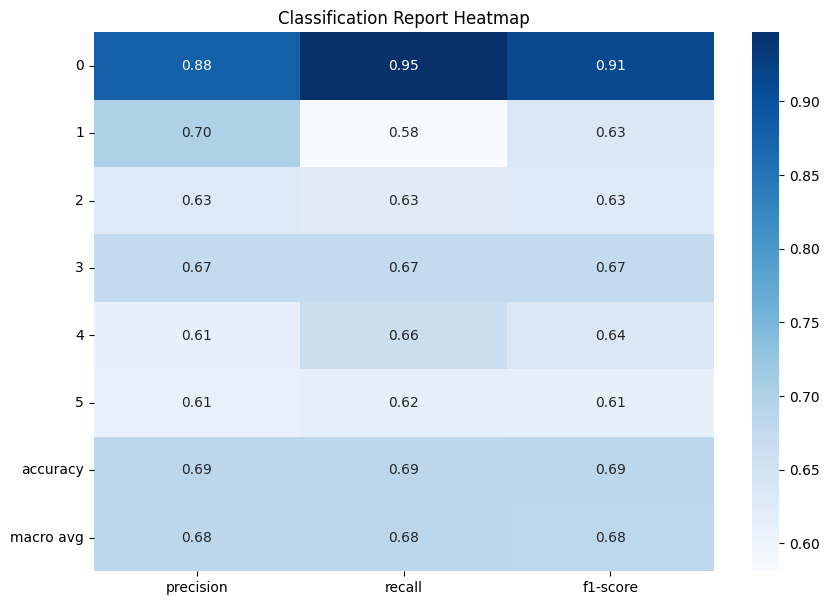

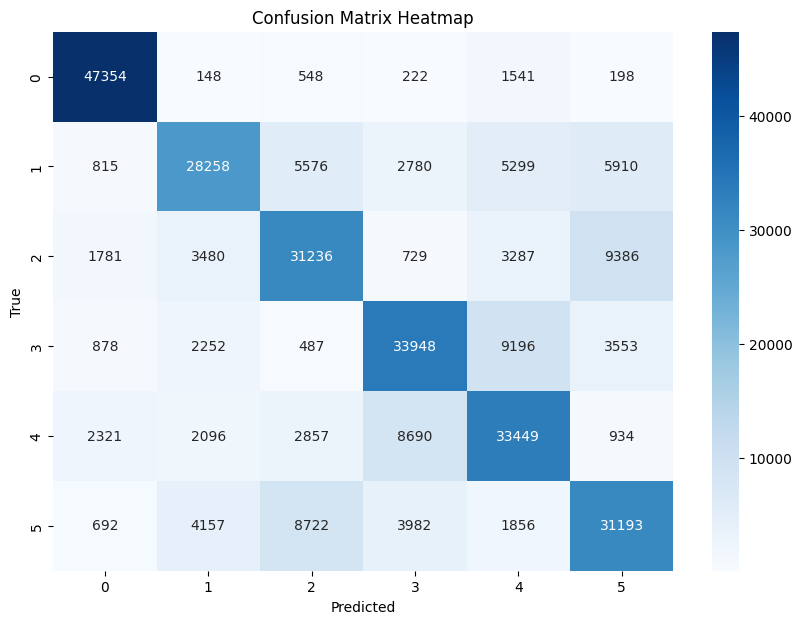

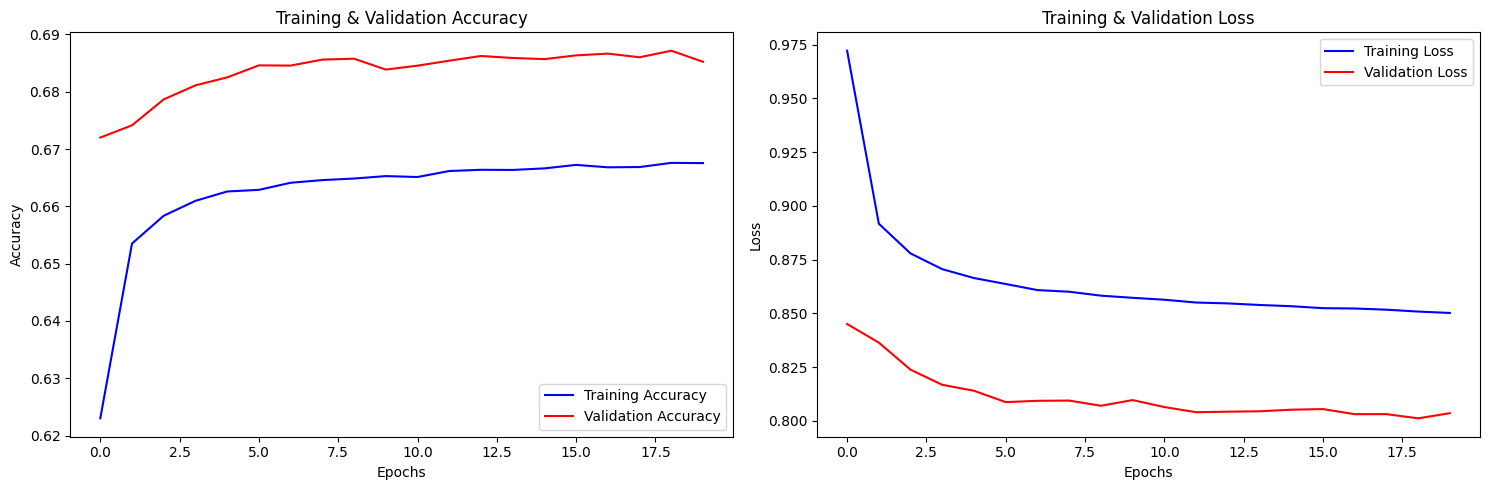

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Classification Report as a Heatmap
cr = classification_report(y_test, y_pred, output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
plt.figure(figsize=(10, 7))
sns.heatmap(cr_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

# Plot Confusion Matrix as a Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Heatmap")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Training and Validation Accuracy & Loss
history_dict = history.history  # Access history metrics

# Get accuracy and loss values
train_accuracy = history_dict['accuracy']
train_loss = history_dict['loss']
val_accuracy = history_dict['val_accuracy']
val_loss = history_dict['val_loss']

# Create subplots for Accuracy and Loss
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Training & Validation Accuracy
axes[0].plot(train_accuracy, label='Training Accuracy', color='b')
axes[0].plot(val_accuracy, label='Validation Accuracy', color='r')
axes[0].set_title('Training & Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Training & Validation Loss
axes[1].plot(train_loss, label='Training Loss', color='b')
axes[1].plot(val_loss, label='Validation Loss', color='r')
axes[1].set_title('Training & Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# Save the model architecture and weights to a file
model.save("model-o-6844.keras")


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform
from sklearn.base import BaseEstimator

# Assuming X and y are your dataset features and labels

# Adjust the class labels to be zero-indexed (if they are in the range 1 to 6, shift them by -1)
#y -= 1  # This shifts class labels from [1, 2, 3, 4, 5, 6] to [0, 1, 2, 3, 4, 5]


df = filtered_data.copy()

# Features (X) and target (y)
X = df.drop('class', axis=1)  # Replace 'class' with your target column name
y = df['class']

# Train-test split (80% training, 20% testing)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42, stratify=y)

# Define the model function for RandomizedSearchCV
def create_model(dropout_rate=0.2, learning_rate=0.001, units=128):
    model = Sequential([
        Dense(units, input_dim=X_train.shape[1], activation='relu'),
        Dropout(dropout_rate),
        Dense(units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Custom KerasClassifier class to make it compatible with scikit-learn
class KerasClassifierCustom(BaseEstimator):
    def __init__(self, build_fn, epochs=10, batch_size=32, verbose=0, dropout_rate=0.2, learning_rate=0.001, units=128):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.units = units

    def fit(self, X, y):
        self.model = self.build_fn(dropout_rate=self.dropout_rate, learning_rate=self.learning_rate, units=self.units)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=-1)

    def score(self, X, y):
        _, accuracy = self.model.evaluate(X, y, verbose=0)
        return accuracy

# Set the parameter grid for RandomizedSearchCV
param_dist = {
    'dropout_rate': uniform(0.2, 0.5),  # Randomize dropout rate between 0.2 and 0.7
    'learning_rate': uniform(1e-5, 1e-2),  # Randomize learning rate between 0.00001 and 0.01
    'units': [256],  # Randomize number of units in the dense layers
    'batch_size': [256],  # Randomize batch sizes
    'epochs': [10],  # Limit epochs to 10 or 20
}

# Wrap the Keras model using the custom KerasClassifier
model = KerasClassifierCustom(build_fn=create_model, verbose=0)

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=15,  # Number of iterations (total combinations of hyperparameters to try)
    cv=2,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

# Fit the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters Found: ", best_params)

# Evaluate the best model
best_model = random_search.best_estimator_

# Evaluate on the test data
test_loss, test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate predictions and evaluate classification metrics
y_pred = best_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 2 folds for each of 15 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters Found:  {'batch_size': 256, 'dropout_rate': 0.38727005942368126, 'epochs': 10, 'learning_rate': 0.009517143064099162, 'units': 256}


TypeError: cannot unpack non-iterable float object

In [ ]:
print(np.unique(y))

[0 1 2 3 4 5]


In [ ]:
y+=1

# CLAUDE 3.7

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling1D, GlobalMaxPooling1D, Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Input, LSTM, Bidirectional, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
import os
from tensorflow.keras.layers import Attention, MultiHeadAttention

# Check GPU availability
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# Set memory growth to avoid occupying all GPU memory at once
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Define constants
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Data preprocessing function with augmentation
def preprocess_data(data_path, window_size=10, step_size=5, signal_amplification=1e5):
    """
    Process raw EMG data into windowed samples with augmentation techniques
    """
    # Load data
    df = pd.read_csv(data_path)

    # Filter out unwanted classes
    filtered_data = df[~df['class'].isin([0, 7])]
    filtered_data.drop(columns=['time', 'label'], inplace=True, errors='ignore')

    # Extract features and labels
    X = filtered_data.drop('class', axis=1).values
    y = filtered_data['class'].values

    # Apply data amplification
    X_amplified = X * signal_amplification

    # Create windowed samples
    X_windowed = []
    y_windowed = []

    # For each sample in the dataset
    for i in range(0, len(X_amplified) - window_size + 1, step_size):
        window = X_amplified[i:i + window_size]
        label = y[i + window_size - 1]  # Use the label of the last sample in the window
        X_windowed.append(window)
        y_windowed.append(label)

    X_windowed = np.array(X_windowed)
    y_windowed = np.array(y_windowed)

    # Apply data augmentation
    X_augmented, y_augmented = augment_data(X_windowed, y_windowed)

    return X_augmented, y_augmented

def augment_data(X, y):
    """
    Apply various augmentation techniques to increase dataset size and variability
    """
    X_augmented = [X]
    y_augmented = [y]

    # 1. Add Gaussian noise
    noise_factor = 0.05
    X_noisy = X + np.random.normal(0, noise_factor, X.shape)
    X_augmented.append(X_noisy)
    y_augmented.append(y)

    # 2. Time warping (randomly stretch or compress time windows slightly)
    X_warped = []
    for sample in X:
        if np.random.random() > 0.5:
            # Stretch
            indices = np.linspace(0, len(sample)-1, len(sample))
            warped = np.array([np.interp(indices, np.linspace(0, len(sample)-1, len(sample)-2),
                                         sample[:-2, i]) for i in range(sample.shape[1])]).T
            X_warped.append(warped)
        else:
            # Compress
            indices = np.linspace(0, len(sample)-1, len(sample))
            warped = np.array([np.interp(indices, np.linspace(0, len(sample)-1, len(sample)+2),
                                        np.pad(sample[:, i], 1, mode='edge')) for i in range(sample.shape[1])]).T
            X_warped.append(warped)

    X_augmented.append(np.array(X_warped))
    y_augmented.append(y)

    # 3. Magnitude scaling (randomly scale amplitude)
    scale_factors = np.random.uniform(0.8, 1.2, size=(len(X), 1, 1))
    X_scaled = X * scale_factors
    X_augmented.append(X_scaled)
    y_augmented.append(y)

    # 4. Channel shuffling (randomly swap a few channels)
    X_shuffled = X.copy()
    for i in range(len(X)):
        if np.random.random() > 0.5:
            # Randomly select two channels to swap
            ch1, ch2 = np.random.choice(X.shape[2], 2, replace=False)
            X_shuffled[i, :, [ch1, ch2]] = X_shuffled[i, :, [ch2, ch1]]

    X_augmented.append(X_shuffled)
    y_augmented.append(y)

    # Combine all augmented data
    X_combined = np.vstack(X_augmented)
    y_combined = np.hstack(y_augmented)

    # Shuffle the combined dataset
    indices = np.arange(len(X_combined))
    np.random.shuffle(indices)
    X_combined = X_combined[indices]
    y_combined = y_combined[indices]

    return X_combined, y_combined

# Create a more advanced model architecture
def create_advanced_model(input_shape, num_classes=6):
    """
    Create an advanced hybrid CNN-LSTM model with attention mechanism
    """
    inputs = Input(shape=input_shape)

    # First branch: CNN path
    x1 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(inputs)
    x1 = BatchNormalization()(x1)
    x1 = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x1)
    x1 = BatchNormalization()(x1)
    x1 = MaxPooling1D(pool_size=2)(x1)
    x1 = Dropout(0.3)(x1)

    # Second branch: CNN with different kernel size
    x2 = Conv1D(64, kernel_size=5, activation='relu', padding='same')(inputs)
    x2 = BatchNormalization()(x2)
    x2 = Conv1D(128, kernel_size=5, activation='relu', padding='same')(x2)
    x2 = BatchNormalization()(x2)
    x2 = MaxPooling1D(pool_size=2)(x2)
    x2 = Dropout(0.3)(x2)

    # Combine CNN branches
    x = Concatenate()([x1, x2])

    # Add attention mechanism
    x = MultiHeadAttention(num_heads=4, key_dim=32)(x, x)

    # Add recurrent layers
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.4)(x)

    # Global pooling
    x_max = GlobalMaxPooling1D()(x)
    x_avg = GlobalAveragePooling1D()(x)
    x = Concatenate()([x_max, x_avg])

    # Dense layers for classification
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Model evaluation with k-fold cross validation
def evaluate_with_kfold(X, y, n_splits=5, batch_size=32, epochs=100):
    """
    Evaluate model using k-fold cross validation
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    fold_accuracy = []
    fold_models = []
    histories = []

    # Convert class indices to one-hot encoding
    y_categorical = to_categorical(y - 1, num_classes=6)  # Adjust for 1-indexed classes

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"\nTraining fold {fold+1}/{n_splits}")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y_categorical[train_idx], y_categorical[val_idx]

        # Create model
        model = create_advanced_model((X.shape[1], X.shape[2]), num_classes=6)

        # Compile model with learning rate scheduling
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Calculate class weights to handle any imbalance
        class_weights = class_weight.compute_class_weight(
            'balanced',
            classes=np.unique(np.argmax(y_train, axis=1)),
            y=np.argmax(y_train, axis=1)
        )
        class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

        # Callbacks
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
        model_checkpoint = ModelCheckpoint(
            f'model_fold_{fold+1}.keras',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )

        # Train model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, lr_scheduler, model_checkpoint],
            class_weight=class_weight_dict,
            verbose=1
        )

        # Evaluate model on validation set
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
        fold_accuracy.append(val_accuracy)
        fold_models.append(model)
        histories.append(history)

        print(f"Fold {fold+1} validation accuracy: {val_accuracy:.4f}")

    # Print average accuracy
    print(f"\nAverage validation accuracy: {np.mean(fold_accuracy):.4f}")

    # Find best model
    best_model_idx = np.argmax(fold_accuracy)
    best_model = fold_models[best_model_idx]

    return best_model, fold_accuracy, histories

# Main execution
def main(data_path):
    """
    Main function to execute the EMG classification pipeline
    """
    # Preprocess data with windowing and augmentation
    X, y = preprocess_data(data_path, window_size=10, step_size=5)

    # Normalize data across the time dimension
    for i in range(len(X)):
        scaler = StandardScaler()
        X[i] = scaler.fit_transform(X[i])

    print(f"Processed dataset shape: {X.shape}, Labels shape: {y.shape}")

    # Train model with k-fold validation
    best_model, fold_accuracy, histories = evaluate_with_kfold(X, y, n_splits=5, batch_size=32, epochs=100)

    # Save best model
    best_model.save("best_emg_model.keras")

    # Plot training history for best model
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(histories[np.argmax(fold_accuracy)].history['accuracy'])
    plt.plot(histories[np.argmax(fold_accuracy)].history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(histories[np.argmax(fold_accuracy)].history['loss'])
    plt.plot(histories[np.argmax(fold_accuracy)].history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.tight_layout()
    plt.savefig('training_history.png')

    # Generate comprehensive evaluation report
    generate_evaluation_report(best_model, X, y)

    return best_model

def generate_evaluation_report(model, X, y):
    """
    Generate a comprehensive evaluation report for the model
    """
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)

    # Convert class indices to one-hot encoding
    y_test_categorical = to_categorical(y_test - 1, num_classes=6)  # Adjust for 1-indexed classes

    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1) + 1  # Convert back to 1-indexed classes
    y_test_classes = y_test

    # Generate classification report
    report = classification_report(y_test_classes, y_pred_classes, digits=4)

    # Generate confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Class {i}' for i in range(1, 7)],
                yticklabels=[f'Class {i}' for i in range(1, 7)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')

    # Save classification report
    with open('classification_report.txt', 'w') as f:
        f.write(report)

    # Print report
    print("\nClassification Report:")
    print(report)

    return report

# Create Gradio interface with the improved model
def setup_gradio_interface(model_path="best_emg_model.keras"):
    """
    Set up Gradio interface for model demonstration
    """
    import gradio as gr

    # Define action mapping
    action_map = {
        1: "Hand at rest",
        2: "Hand clenched in a fist",
        3: "Wrist flexion",
        4: "Wrist extension",
        5: "Radial deviations",
        6: "Ulnar deviations",
    }

    def predict_action(e1, e2, e3, e4, e5, e6, e7, e8):
        # Load the best model
        model = tf.keras.models.load_model(model_path)

        # Preprocess input data
        input_data = np.array([[e1, e2, e3, e4, e5, e6, e7, e8]])
        input_data = input_data * 1e5  # Apply the same amplification

        # Create a window of 10 samples (replicate the single input)
        window_data = np.tile(input_data, (10, 1))

        # Normalize
        scaler = StandardScaler()
        window_data = scaler.fit_transform(window_data)

        # Reshape for model input
        model_input = window_data.reshape(1, 10, 8)

        # Make prediction
        prediction = model.predict(model_input)
        predicted_class = np.argmax(prediction, axis=-1)[0] + 1  # Add 1 to convert to 1-indexed classes

        # Get confidence scores
        confidence = prediction[0][predicted_class-1] * 100

        result = f"{action_map.get(predicted_class, 'Unknown action')} (Confidence: {confidence:.2f}%)"

        # Return all class probabilities
        probs = {action_map[i+1]: float(prediction[0][i]*100) for i in range(6)}

        return result, probs

    # Define Gradio interface
    inputs = [
        gr.Number(label=f"Channel {i+1}") for i in range(8)
    ]

    outputs = [
        gr.Textbox(label="Prediction"),
        gr.Label(label="Class Probabilities (%)")
    ]

    examples = [
        [-2.00e-05, 1.00e-05, 2.20e-04, 1.80e-04, -1.50e-04, -5.00e-05, 1.00e-05, 0],
        [1.60e-04, -1.00e-04, -2.40e-04, 2.00e-04, 1.00e-04, -9.00e-05, -5.00e-05, -5.00e-05],
        [-1.00e-05, 1.00e-05, 1.00e-05, 0, -2.00e-05, 0, -3.00e-05, -3.00e-05],
    ]

    iface = gr.Interface(
        fn=predict_action,
        inputs=inputs,
        outputs=outputs,
        title="EMG Signal Classifier",
        description="Enter 8 channel EMG values to predict hand/wrist action.",
        examples=examples,
        flagging_options=["Correct", "Incorrect"],
        theme="huggingface"
    )

    return iface

# If running as main script
if __name__ == "__main__":
    # Set your file path here
    file_path = 'path/to/dataset'

    # Run the main pipeline
    best_model = main(file_path)

    # Launch Gradio interface
    iface = setup_gradio_interface()
    iface.launch(share=True)

# TRAINING

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling1D, GlobalMaxPooling1D, Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Input, LSTM, Bidirectional, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
import os
from tensorflow.keras.layers import Attention, MultiHeadAttention
from tensorflow.keras.mixed_precision import set_global_policy

# Enable mixed precision for faster training on A100 GPU
set_global_policy('mixed_float16')

# Check GPU availability
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# Set memory growth to avoid occupying all GPU memory at once
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Define constants
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Data preprocessing function with augmentation
def preprocess_data(data_path, window_size=10, step_size=5, signal_amplification=1e5):
    """
    Process raw EMG data into windowed samples with augmentation techniques
    """
    print(f"Loading data from {data_path}...")

    # Load data
    df = pd.read_csv(data_path)

    # Filter out unwanted classes if present
    filtered_data = df[~df['class'].isin([0, 7])]

    # Drop unnecessary columns if they exist
    columns_to_drop = [col for col in ['time', 'label'] if col in filtered_data.columns]
    if columns_to_drop:
        filtered_data.drop(columns=columns_to_drop, inplace=True)

    print(f"Data shape after filtering: {filtered_data.shape}")
    print(f"Class distribution: {filtered_data['class'].value_counts().sort_index()}")

    # Extract features and labels
    X = filtered_data.drop('class', axis=1).values
    y = filtered_data['class'].values

    # Apply data amplification
    X_amplified = X * signal_amplification

    print(f"Applying windowing with window_size={window_size}, step_size={step_size}...")

    # Create windowed samples
    X_windowed = []
    y_windowed = []

    # For each sample in the dataset
    for i in range(0, len(X_amplified) - window_size + 1, step_size):
        window = X_amplified[i:i + window_size]
        label = y[i + window_size - 1]  # Use the label of the last sample in the window
        X_windowed.append(window)
        y_windowed.append(label)

    X_windowed = np.array(X_windowed)
    y_windowed = np.array(y_windowed)

    print(f"Windowed data shape: {X_windowed.shape}")
    print(f"Windowed labels shape: {y_windowed.shape}")

    print("Applying data augmentation...")

    # Apply data augmentation
    X_augmented, y_augmented = augment_data(X_windowed, y_windowed)

    print(f"Data shape after augmentation: {X_augmented.shape}")
    print(f"Labels shape after augmentation: {y_augmented.shape}")

    return X_augmented, y_augmented

def augment_data(X, y):
    """
    Apply various augmentation techniques to increase dataset size and variability
    """
    X_augmented = [X]
    y_augmented = [y]

    # 1. Add Gaussian noise
    noise_factor = 0.05
    X_noisy = X + np.random.normal(0, noise_factor, X.shape)
    X_augmented.append(X_noisy)
    y_augmented.append(y)

    # 2. Time warping (randomly stretch or compress time windows slightly)
    X_warped = []
    for sample in X:
        if np.random.random() > 0.5:
            # Stretch
            indices = np.linspace(0, len(sample)-1, len(sample))
            warped = np.array([np.interp(indices, np.linspace(0, len(sample)-1, len(sample)-2),
                                         sample[:-2, i]) for i in range(sample.shape[1])]).T
            X_warped.append(warped)
        else:
            # Compress
            indices = np.linspace(0, len(sample)-1, len(sample))
            warped = np.array([np.interp(indices, np.linspace(0, len(sample)-1, len(sample)+2),
                                        np.pad(sample[:, i], 1, mode='edge')) for i in range(sample.shape[1])]).T
            X_warped.append(warped)

    X_augmented.append(np.array(X_warped))
    y_augmented.append(y)

    # 3. Magnitude scaling (randomly scale amplitude)
    scale_factors = np.random.uniform(0.8, 1.2, size=(len(X), 1, 1))
    X_scaled = X * scale_factors
    X_augmented.append(X_scaled)
    y_augmented.append(y)

    # 4. Channel shuffling (randomly swap a few channels)
    X_shuffled = X.copy()
    for i in range(len(X)):
        if np.random.random() > 0.5:
            # Randomly select two channels to swap
            ch1, ch2 = np.random.choice(X.shape[2], 2, replace=False)
            X_shuffled[i, :, [ch1, ch2]] = X_shuffled[i, :, [ch2, ch1]]

    X_augmented.append(X_shuffled)
    y_augmented.append(y)

    # Combine all augmented data
    X_combined = np.vstack(X_augmented)
    y_combined = np.hstack(y_augmented)

    # Shuffle the combined dataset
    indices = np.arange(len(X_combined))
    np.random.shuffle(indices)
    X_combined = X_combined[indices]
    y_combined = y_combined[indices]

    return X_combined, y_combined

# Create a more advanced model architecture
def create_advanced_model(input_shape, num_classes=6):
    """
    Create an advanced hybrid CNN-LSTM model with attention mechanism
    """
    inputs = Input(shape=input_shape)

    # First branch: CNN path
    x1 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(inputs)
    x1 = BatchNormalization()(x1)
    x1 = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x1)
    x1 = BatchNormalization()(x1)
    x1 = MaxPooling1D(pool_size=2)(x1)
    x1 = Dropout(0.3)(x1)

    # Second branch: CNN with different kernel size
    x2 = Conv1D(64, kernel_size=5, activation='relu', padding='same')(inputs)
    x2 = BatchNormalization()(x2)
    x2 = Conv1D(128, kernel_size=5, activation='relu', padding='same')(x2)
    x2 = BatchNormalization()(x2)
    x2 = MaxPooling1D(pool_size=2)(x2)
    x2 = Dropout(0.3)(x2)

    # Combine CNN branches
    x = Concatenate()([x1, x2])

    # Add attention mechanism
    x = MultiHeadAttention(num_heads=4, key_dim=32)(x, x)

    # Add recurrent layers
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Dropout(0.4)(x)

    # Global pooling
    x_max = GlobalMaxPooling1D()(x)
    x_avg = GlobalAveragePooling1D()(x)
    x = Concatenate()([x_max, x_avg])

    # Dense layers for classification
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax', dtype='float32')(x)  # Force float32 output for mixed precision

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Save preprocessing parameters for later inference
def save_preprocessing_params(window_size, step_size, signal_amplification, file_path='preprocessing_params.npz'):
    """
    Save preprocessing parameters for later use during inference
    """
    np.savez(file_path,
             window_size=window_size,
             step_size=step_size,
             signal_amplification=signal_amplification)
    print(f"Preprocessing parameters saved to {file_path}")

# Model evaluation with k-fold cross validation
def evaluate_with_kfold(X, y, n_splits=5, batch_size=32, epochs=100, model_save_dir='models'):
    """
    Evaluate model using k-fold cross validation
    """
    # Create directory for saving models if it doesn't exist
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED)
    fold_accuracy = []
    fold_models = []
    histories = []

    # Convert class indices to one-hot encoding (adjust for 1-indexed classes)
    y_categorical = to_categorical(y - 1, num_classes=6)

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"\n{'='*50}")
        print(f"Training fold {fold+1}/{n_splits}")
        print(f"{'='*50}")

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y_categorical[train_idx], y_categorical[val_idx]

        print(f"Training data shape: {X_train.shape}")
        print(f"Validation data shape: {X_val.shape}")

        # Create model
        model = create_advanced_model((X.shape[1], X.shape[2]), num_classes=6)

        # Compile model with learning rate scheduling
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        # Calculate class weights to handle any imbalance
        class_weights = class_weight.compute_class_weight(
            'balanced',
            classes=np.unique(np.argmax(y_train, axis=1)),
            y=np.argmax(y_train, axis=1)
        )
        class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

        # Print model summary
        model.summary()

        # Callbacks
        early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
        model_checkpoint = ModelCheckpoint(
            os.path.join(model_save_dir, f'model_fold_{fold+1}.keras'),
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )

        # Train model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, lr_scheduler, model_checkpoint],
            class_weight=class_weight_dict,
            verbose=1
        )

        # Evaluate model on validation set
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
        fold_accuracy.append(val_accuracy)
        fold_models.append(model)
        histories.append(history)

        print(f"Fold {fold+1} validation accuracy: {val_accuracy:.4f}")

        # Save detailed metrics for this fold
        y_pred = model.predict(X_val)
        y_pred_classes = np.argmax(y_pred, axis=1) + 1
        y_val_classes = np.argmax(y_val, axis=1) + 1

        # Generate classification report
        report = classification_report(y_val_classes, y_pred_classes, digits=4)

        # Save report to file
        with open(os.path.join(model_save_dir, f'report_fold_{fold+1}.txt'), 'w') as f:
            f.write(f"Fold {fold+1} validation accuracy: {val_accuracy:.4f}\n\n")
            f.write(report)

        # Plot and save confusion matrix
        plt.figure(figsize=(10, 8))
        cm = confusion_matrix(y_val_classes, y_pred_classes)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[f'Class {i}' for i in range(1, 7)],
                    yticklabels=[f'Class {i}' for i in range(1, 7)])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Confusion Matrix - Fold {fold+1}')
        plt.tight_layout()
        plt.savefig(os.path.join(model_save_dir, f'confusion_matrix_fold_{fold+1}.png'))
        plt.close()

    # Print average accuracy
    print(f"\n{'='*50}")
    print(f"Average validation accuracy: {np.mean(fold_accuracy):.4f}")
    print(f"{'='*50}")

    # Plot accuracies for each fold
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n_splits+1), fold_accuracy)
    plt.xlabel('Fold')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy per Fold')
    plt.xticks(range(1, n_splits+1))
    plt.ylim(0, 1)
    for i, acc in enumerate(fold_accuracy):
        plt.text(i+1, acc+0.01, f'{acc:.4f}', ha='center')
    plt.tight_layout()
    plt.savefig(os.path.join(model_save_dir, 'fold_accuracies.png'))

    # Find best model
    best_model_idx = np.argmax(fold_accuracy)
    best_model = fold_models[best_model_idx]
    best_model_path = os.path.join(model_save_dir, 'best_model.keras')
    best_model.save(best_model_path)
    print(f"Best model (fold {best_model_idx+1}) saved to {best_model_path}")

    # Save training history for best model
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(histories[best_model_idx].history['accuracy'])
    plt.plot(histories[best_model_idx].history['val_accuracy'])
    plt.title('Best Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(histories[best_model_idx].history['loss'])
    plt.plot(histories[best_model_idx].history['val_loss'])
    plt.title('Best Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.savefig(os.path.join(model_save_dir, 'best_model_history.png'))

    return best_model, fold_accuracy, histories, best_model_idx

# Main execution function
def main():
    """
    Main function to execute the EMG classification pipeline
    """
    import argparse
    parser = argparse.ArgumentParser(description='Train EMG classification model')
    parser.add_argument('--data_path', type=str, required=True, help='Path to the dataset CSV file')
    parser.add_argument('--window_size', type=int, default=10, help='Size of the sliding window')
    parser.add_argument('--step_size', type=int, default=5, help='Step size for the sliding window')
    parser.add_argument('--batch_size', type=int, default=64, help='Batch size for training')
    parser.add_argument('--epochs', type=int, default=100, help='Maximum number of epochs')
    parser.add_argument('--folds', type=int, default=5, help='Number of folds for cross-validation')
    parser.add_argument('--output_dir', type=str, default='emg_model', help='Directory to save models and results')

    args = parser.parse_args()

    # Create output directory if it doesn't exist
    if not os.path.exists(args.output_dir):
        os.makedirs(args.output_dir)

    # Set signal amplification parameter
    signal_amplification = 1e5

    # Save parameters for future inference
    save_preprocessing_params(args.window_size, args.step_size, signal_amplification,
                             os.path.join(args.output_dir, 'preprocessing_params.npz'))

    # Preprocess data with windowing and augmentation
    X, y = preprocess_data(args.data_path, window_size=args.window_size,
                          step_size=args.step_size, signal_amplification=signal_amplification)

    # Normalize data across the time dimension for each window
    print("Normalizing data...")
    for i in range(len(X)):
        scaler = StandardScaler()
        X[i] = scaler.fit_transform(X[i])

    # Train model with k-fold validation
    best_model, fold_accuracy, histories, best_fold = evaluate_with_kfold(
        X, y, n_splits=args.folds, batch_size=args.batch_size,
        epochs=args.epochs, model_save_dir=args.output_dir
    )

    # Save results summary
    with open(os.path.join(args.output_dir, 'results_summary.txt'), 'w') as f:
        f.write(f"EMG Classification Model Results\n")
        f.write(f"==============================\n\n")
        f.write(f"Dataset: {args.data_path}\n")
        f.write(f"Window size: {args.window_size}\n")
        f.write(f"Step size: {args.step_size}\n")
        f.write(f"Signal amplification: {signal_amplification}\n")
        f.write(f"Number of folds: {args.folds}\n")
        f.write(f"Batch size: {args.batch_size}\n")
        f.write(f"Maximum epochs: {args.epochs}\n\n")
        f.write(f"Fold accuracies:\n")
        for i, acc in enumerate(fold_accuracy):
            f.write(f"  Fold {i+1}: {acc:.4f}\n")
        f.write(f"\nAverage accuracy: {np.mean(fold_accuracy):.4f}\n")
        f.write(f"Best fold: {best_fold+1} (accuracy: {fold_accuracy[best_fold]:.4f})\n")

        # Add early stopping epoch info for best model
        if 'val_accuracy' in histories[best_fold].history:
            best_epoch = np.argmax(histories[best_fold].history['val_accuracy']) + 1
            f.write(f"Best epoch: {best_epoch}\n")
            f.write(f"Best validation accuracy: {max(histories[best_fold].history['val_accuracy']):.4f}\n")

    print(f"\nTraining completed successfully. Results saved to {args.output_dir}")
    return best_model

# Call main function if running as script
if __name__ == "__main__":
    main()

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


usage: colab_kernel_launcher.py [-h] --data_path DATA_PATH [--window_size WINDOW_SIZE]
                                [--step_size STEP_SIZE] [--batch_size BATCH_SIZE]
                                [--epochs EPOCHS] [--folds FOLDS] [--output_dir OUTPUT_DIR]
colab_kernel_launcher.py: error: the following arguments are required: --data_path


SystemExit: 2

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
